# Grades of Students dataset

### Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description -- total 43 columns -Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

**Predict-CGPA of a student based on different grades in four years.**

# Solution:-

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [ ]:
data.head()

In [4]:
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [5]:
#Lets check the shape of the data
data.shape

(571, 43)

So , we have 571 rows and 43 columns

In [6]:
#Lets check null values
data.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

We have lots of null values. Lets calulcate them.

In [7]:
data.isna().sum().sum()

425

So We have 425 Null Values. We have to treat them.

In [8]:
#Lets check dumplicats
data.duplicated().sum()

0

We dont have duplicates . we are good to proceed . and we also dont need to check duplicates value in CGPA pridiction.

In [9]:
#Checking the datatype of the columns
data.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

All Columns are object . only CGPA  is float . and 99% of the time float is continious data.

# EDA

In [10]:
data['CS-412'].unique()

array(['A-', 'B', 'A', 'C+', 'B+', 'C-', 'B-', nan, 'A+', 'C', 'D+', 'F',
       'W', 'D'], dtype=object)

In [11]:
#Lets import visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

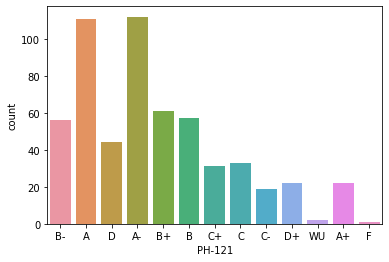

A-    112

A     111

B+     61

B      57

B-     56

D      44

C      33

C+     31

D+     22

A+     22

C-     19

WU      2

F       1

Name: PH-121, dtype: int64


571

In [12]:
#Lets plot PH-121 OuR first columns.
sns.countplot(x='PH-121',data=data)
plt.show()
print(data['PH-121'].value_counts())
data['PH-121'].value_counts().sum()

# Observation


These Grades are containing by Students in  Department of PH 1st Year Student.

A-   -> 112 Students


A    -> 111 Students


B+   -> 61 Students


B    -> 57 Students


B-   -> 56 Students


D    -> 44 Students


C    -> 33 Students


C+   -> 31 Students


D+   -> 22 Students


A+   -> 22 Students


C-   -> 19 Students


WU(failing grade)   ->  2 Students


F    ->  1 Students

Total Students - 571

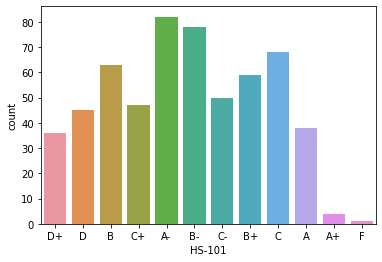

A-    82

B-    78

C     68

B     63

B+    59

C-    50

C+    47

D     45

A     38

D+    36

A+     4

F      1

Name: HS-101, dtype: int64


571

In [13]:
#Lets plot  OuR first columns.
sns.countplot(x='HS-101',data=data)
plt.show()
print(data['HS-101'].value_counts())
data['HS-101'].value_counts().sum()

# Observation


These Grades are containing by Students in  Department of HS-101 Year Student.



A-  ->  82 Students 


B-  ->  78 Students


C   ->  68 Students


B   ->  63 Students


B+  ->  59 Students


C-  ->  50 Students


C+  ->  47 Students


D   ->  45 Students


A   ->  38 Students


D+  ->  36 Students


A+  ->   4 Students


F (Fail)  ->   1 Students 

Total 510 Students 

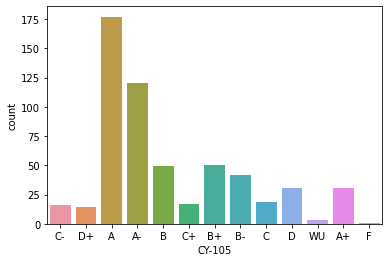

A     177

A-    120

B+     50

B      49

B-     42

D      31

A+     31

C      19

C+     17

C-     16

D+     14

WU      3

F       1

Name: CY-105, dtype: int64


570

In [14]:
#Lets plot CY-105  columns.
sns.countplot(x='CY-105',data=data)
plt.show()
print(data['CY-105'].value_counts())
data['CY-105'].value_counts().sum()

# Observation

These Grades are containing by Students in  Department of CY-105 Year Student.



A      -> 177 Students


A-     -> 120 Students


B+     ->  50 Students


B      ->  49 Students


B-     ->  42 Students


D      ->  31 Students


A+     ->  31 Students


C      ->  19 Students


C+     ->  17 Students


C-     ->  16 Students


D+     ->  14 Students


WU     ->   3 Students


F      ->   1 Students

Total - 570 Students

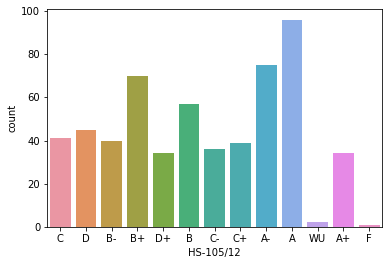

A     96

A-    75

B+    70

B     57

D     45

C     41

B-    40

C+    39

C-    36

D+    34

A+    34

WU     2

F      1

Name: HS-105/12, dtype: int64


570

In [15]:
#Lets plot CY-105  columns.
sns.countplot(x='HS-105/12',data=data)
plt.show()
print(data['HS-105/12'].value_counts())
data['HS-105/12'].value_counts().sum()

# Observation

These Grades are containing by Students in  Department of HS-105 Year Student.

A   ->   96 Students 


A-  ->   75 Students 


B+  ->   70 Students 


B   ->   57 Students 


D   ->   45 Students 


C   ->   41 Students 


B-  ->   40 Students 


C+  ->   39 Students 


C-  ->   36 Students 


D+  ->   34 Students 


A+  ->   34 Students 


WU  ->    2 Students 


F   ->    1 Students 

Total - 571 Students

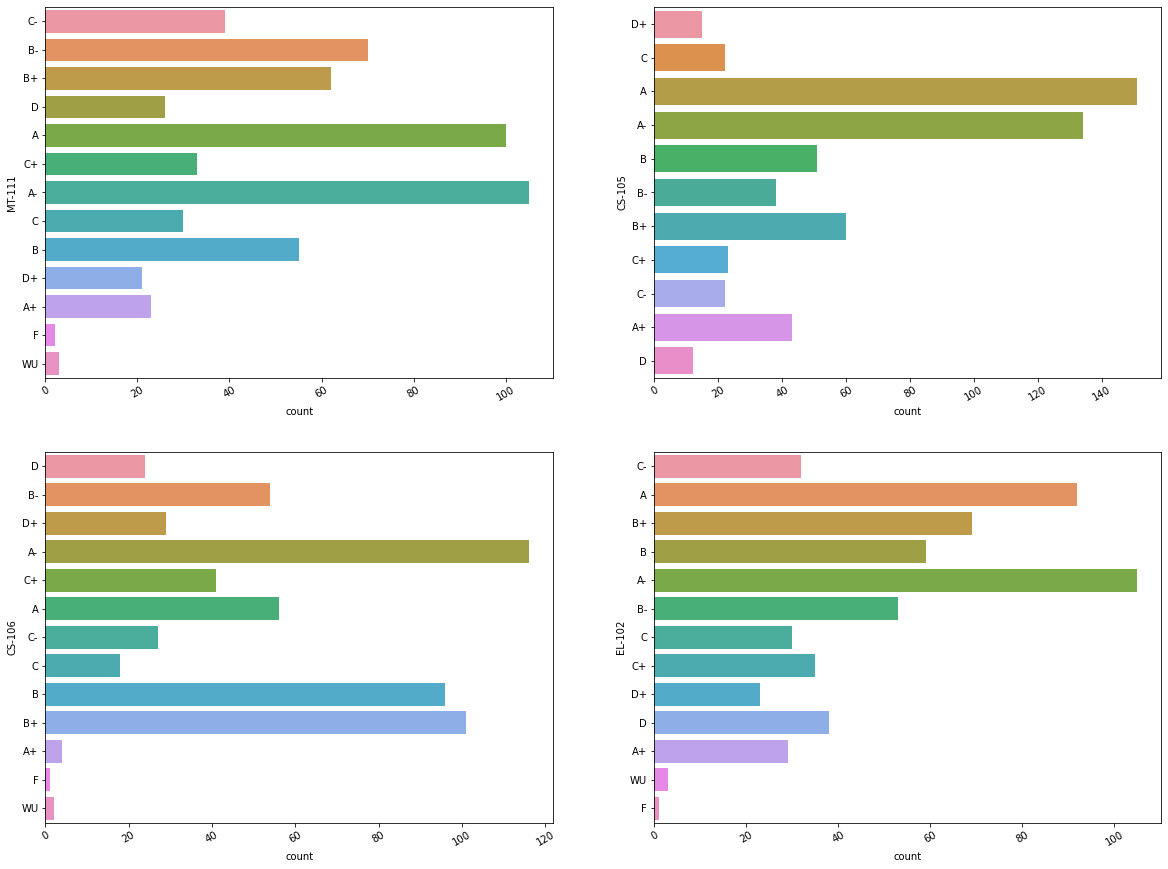

In [16]:
#Lets plot 5 to 8 columns in one code .
plt.figure(figsize=(20,15))
plotnumber=1
for col in data.columns[5:9]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()


So , Here plot 4 Column in one code and observe all the columns .

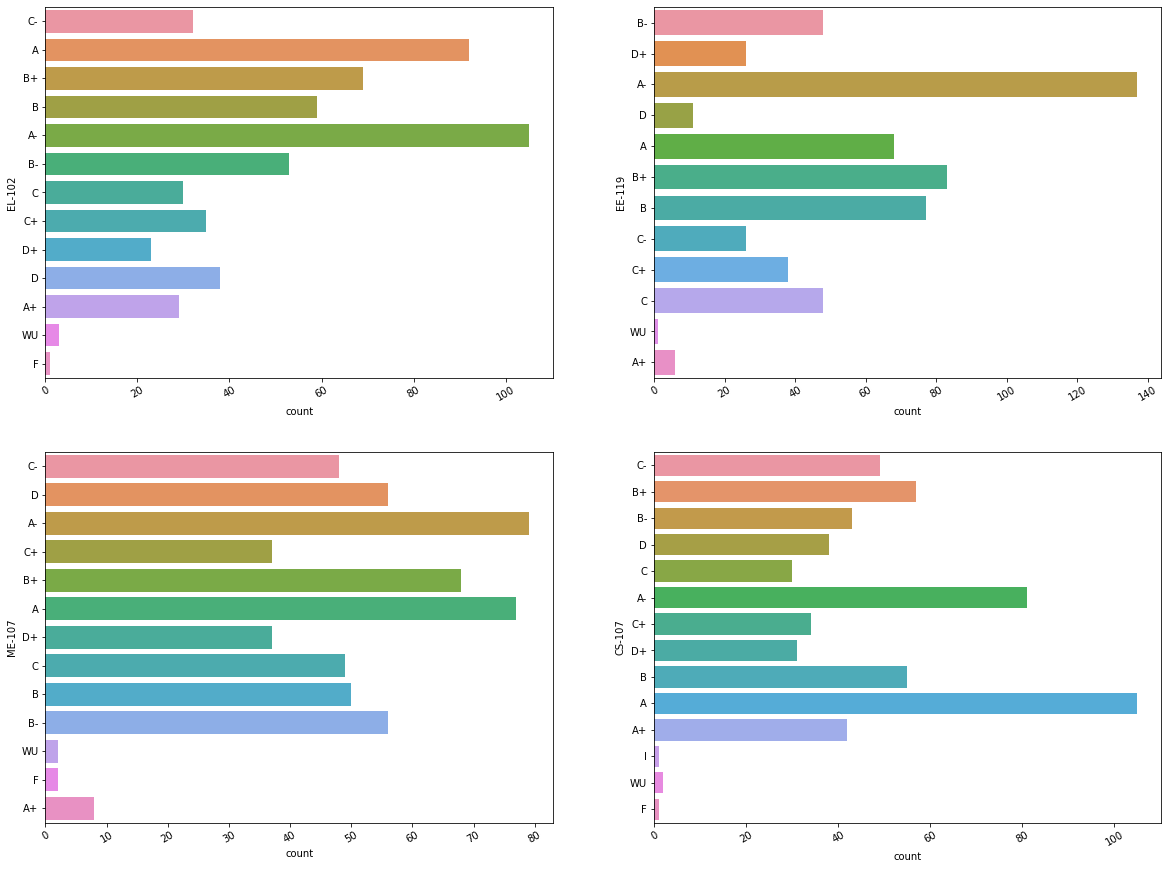

In [17]:
#Lets plot 8 to 12 columns in one code .
plt.figure(figsize=(20,15))
plotnumber=1
for col in data.columns[8:12]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()


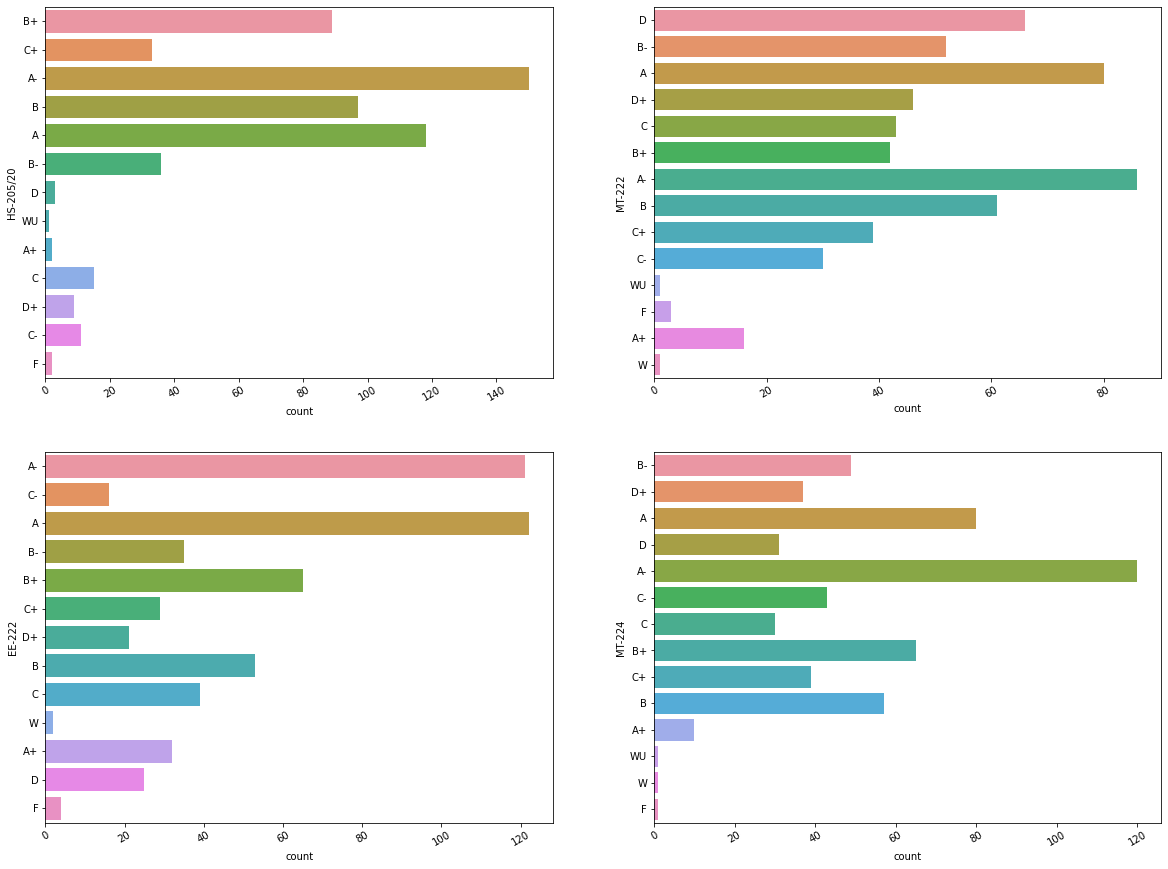

In [18]:
#Lets plot 12 to 16 columns in one code .
plt.figure(figsize=(20,15))
plotnumber=1
for col in data.columns[12:16]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()


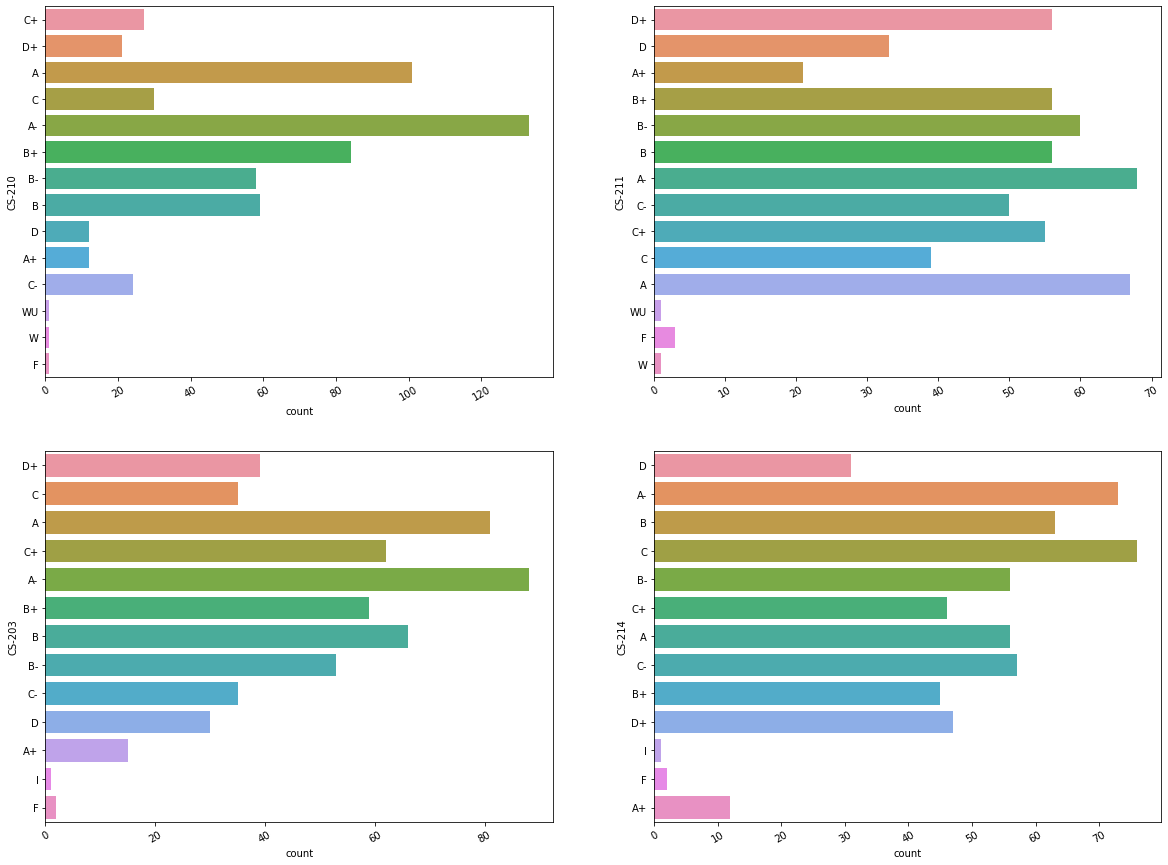

In [19]:
#Lets plot 16 to 20 columns in one code .
plt.figure(figsize=(20,15))
plotnumber=1
for col in data.columns[16:20]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()

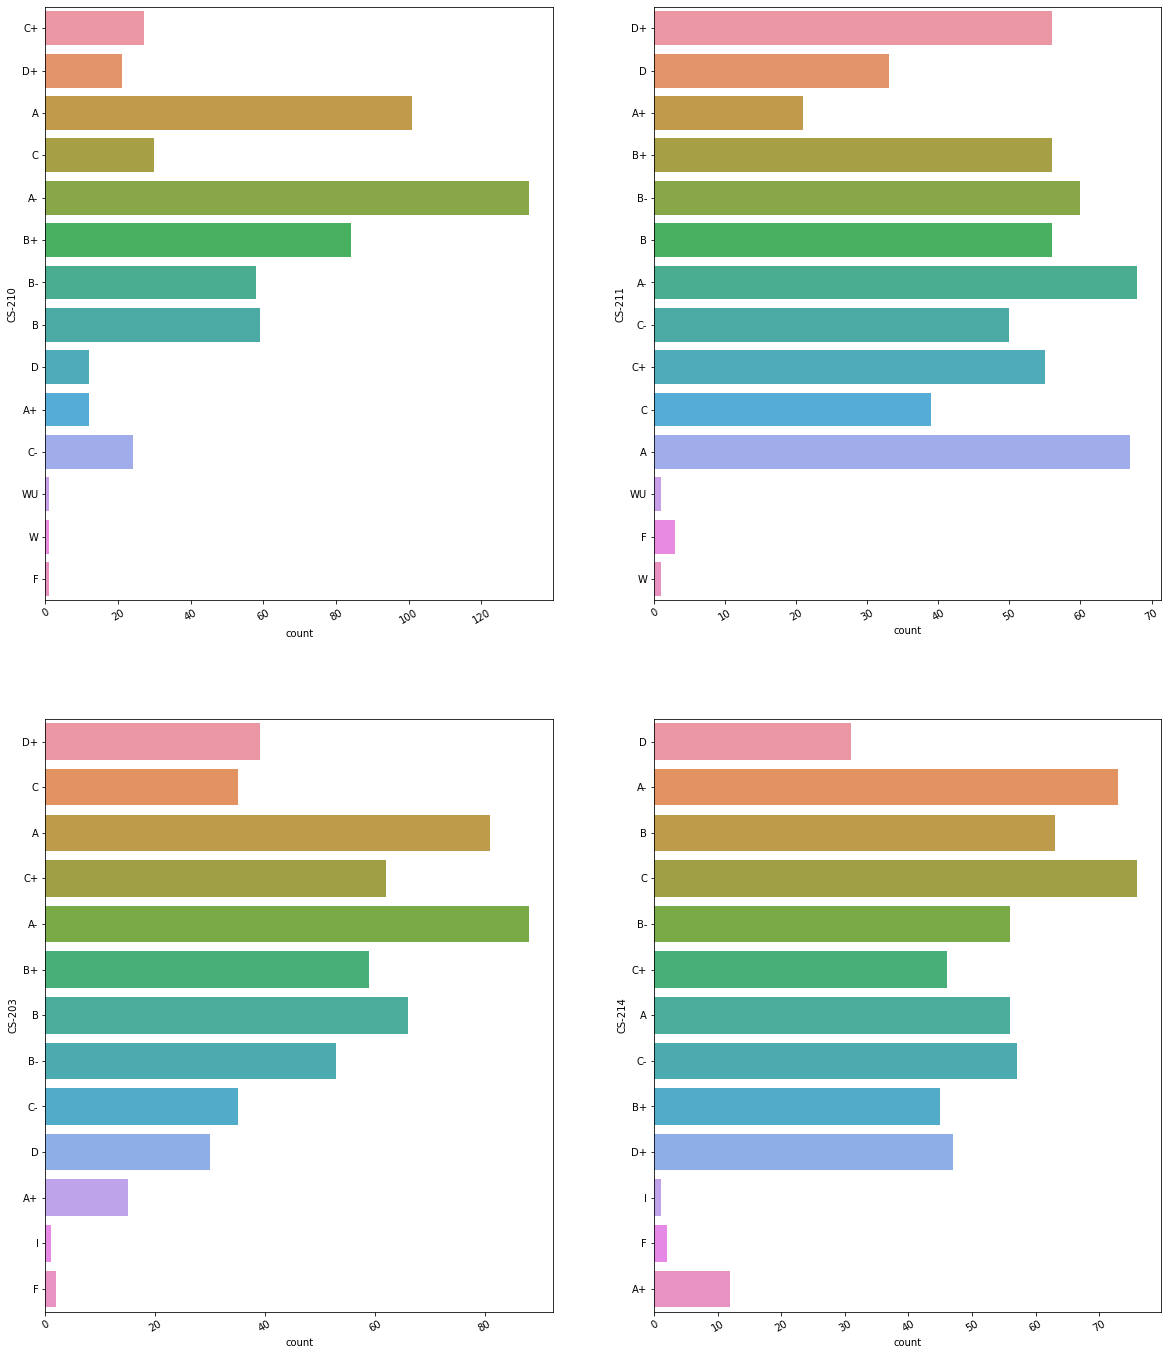

In [20]:
#Lets plot 20 to 24 columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data.columns[16:20]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()


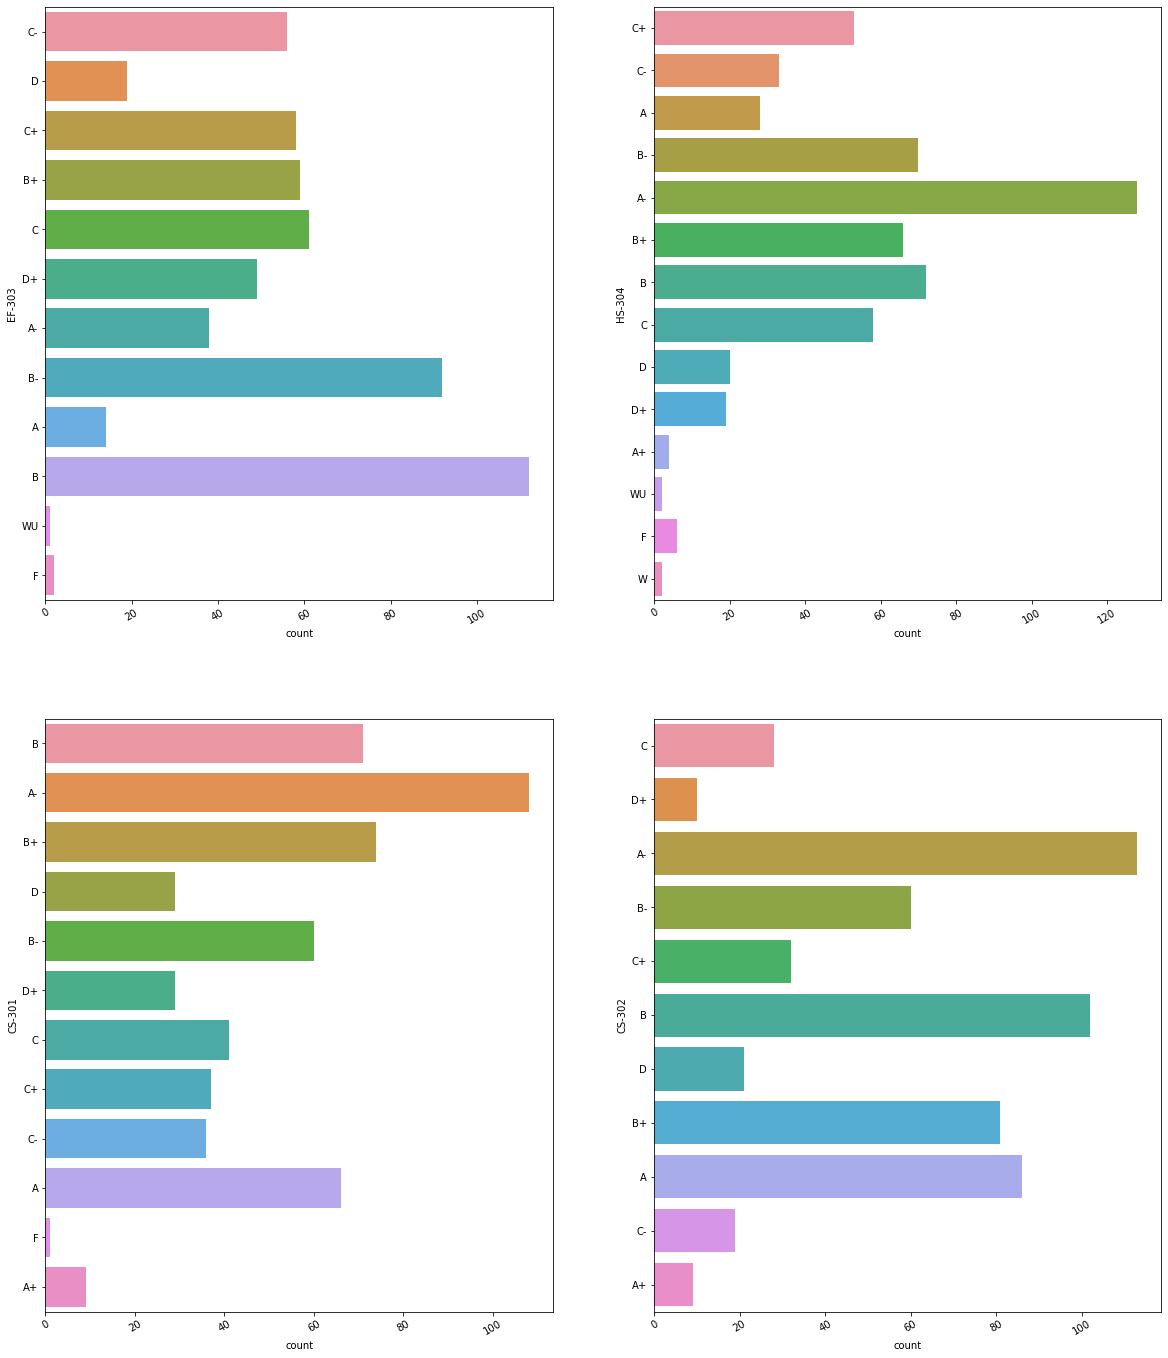

In [21]:
#Lets plot 24 to 28 columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data.columns[24:28]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()


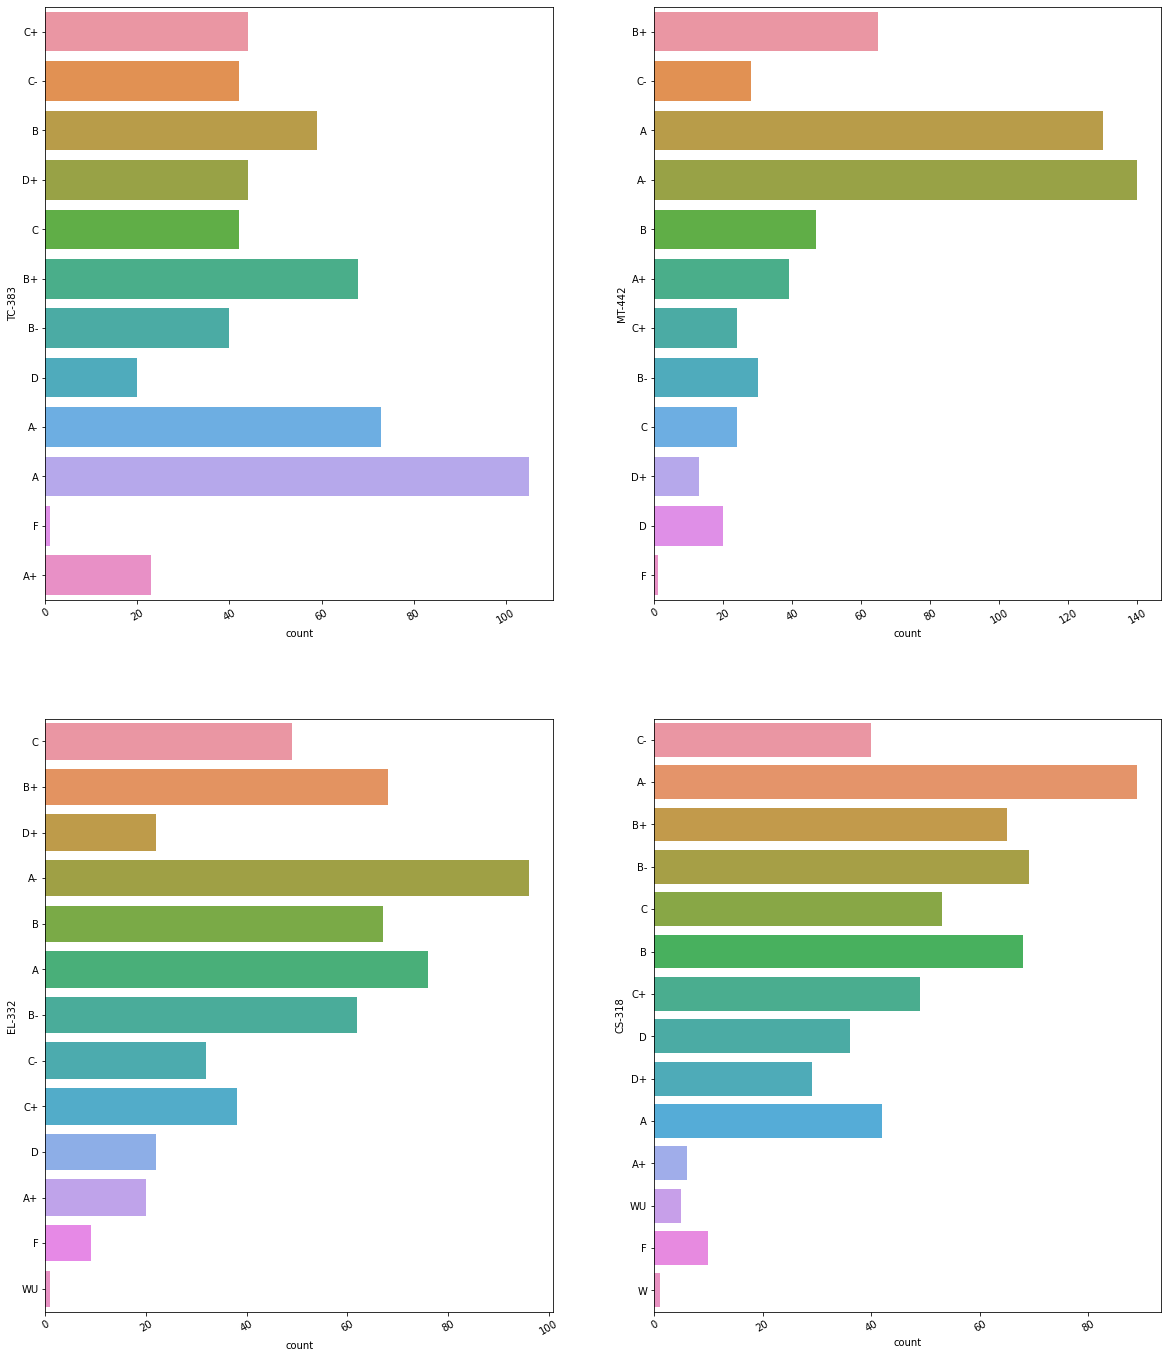

In [22]:
#Lets plot 28 to 32 columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data.columns[28:32]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()


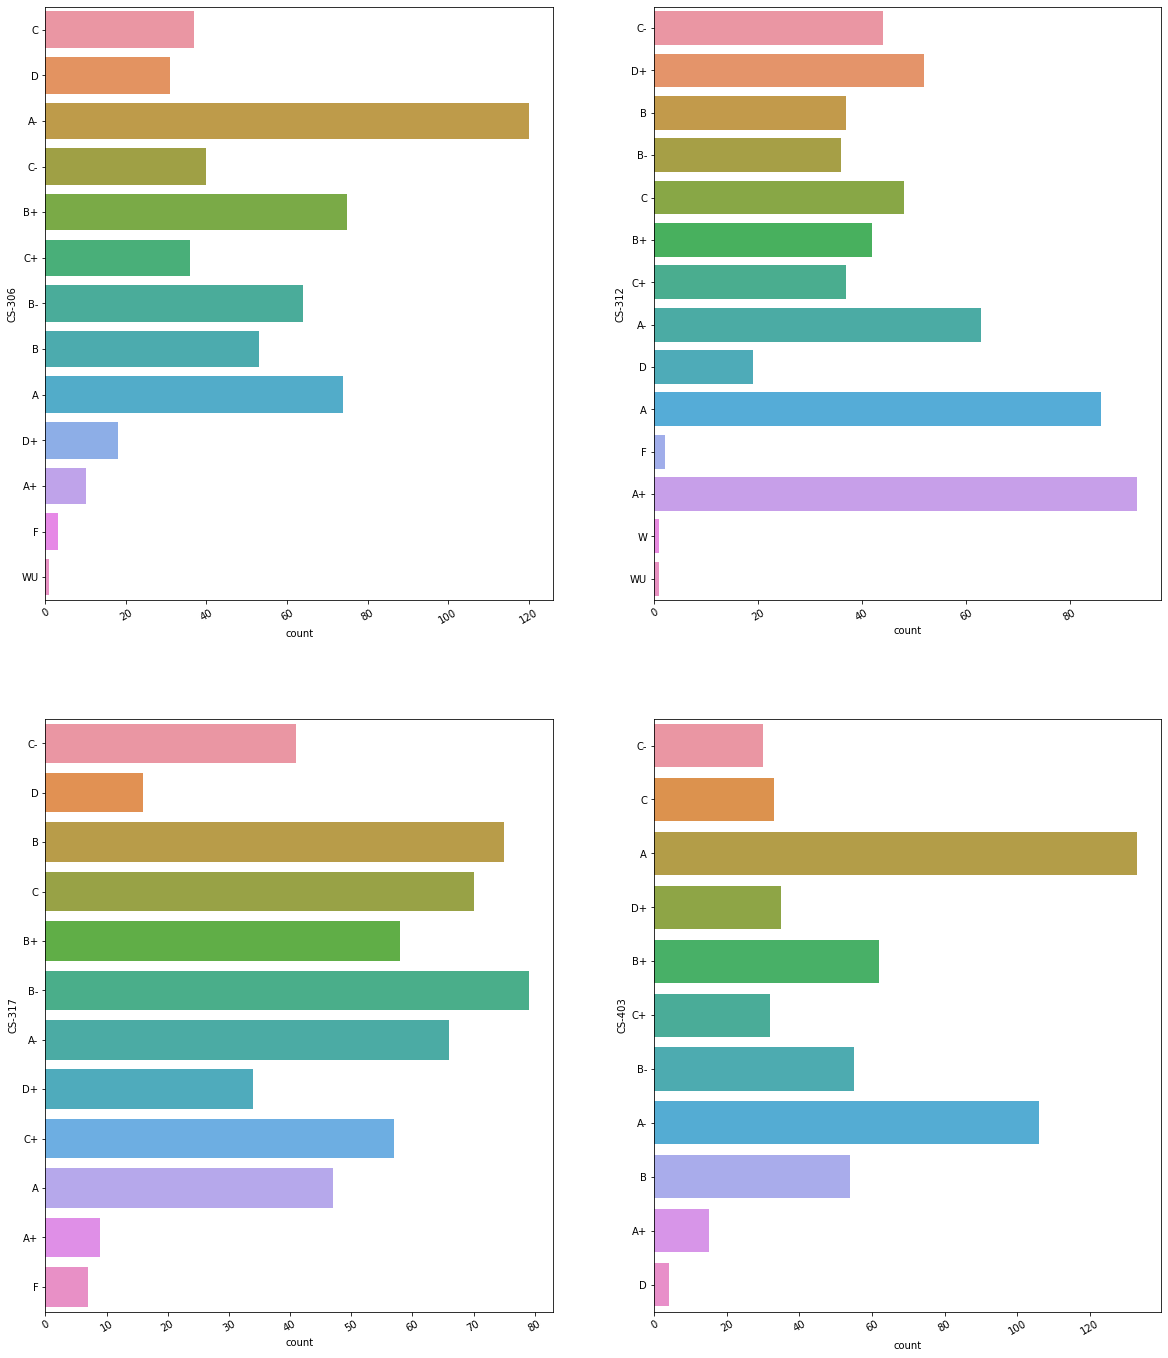

In [23]:
#Lets plot 32 to 36 columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data.columns[32:36]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()


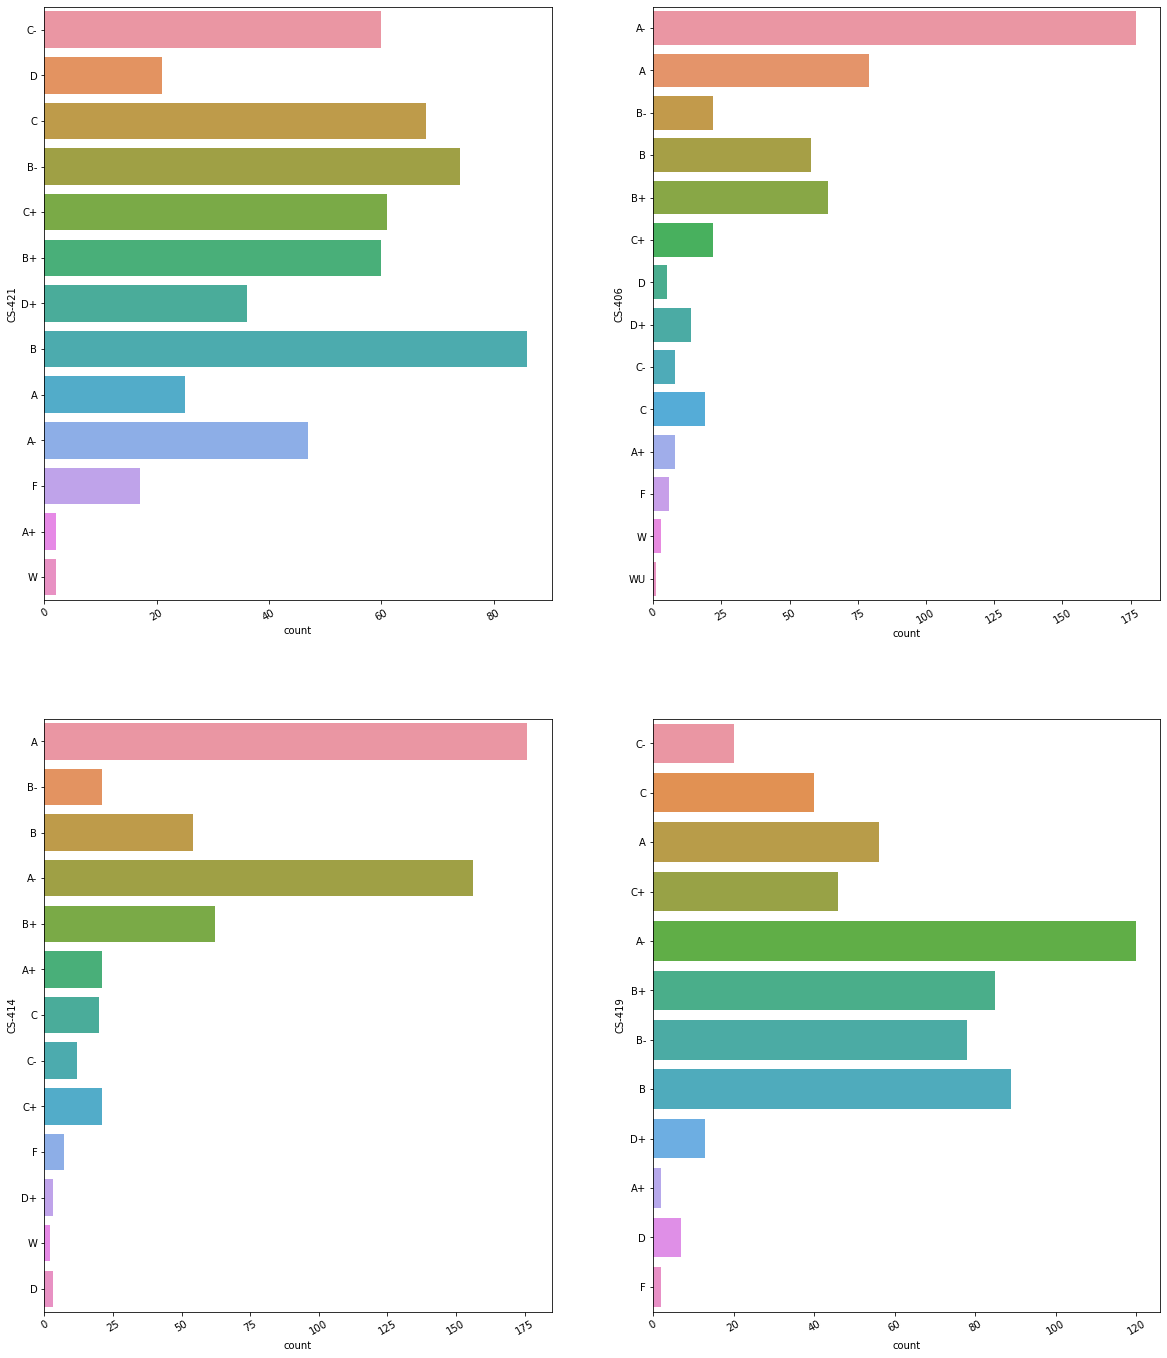

In [24]:
#Lets plot 36 to 40 columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data.columns[36:40]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()


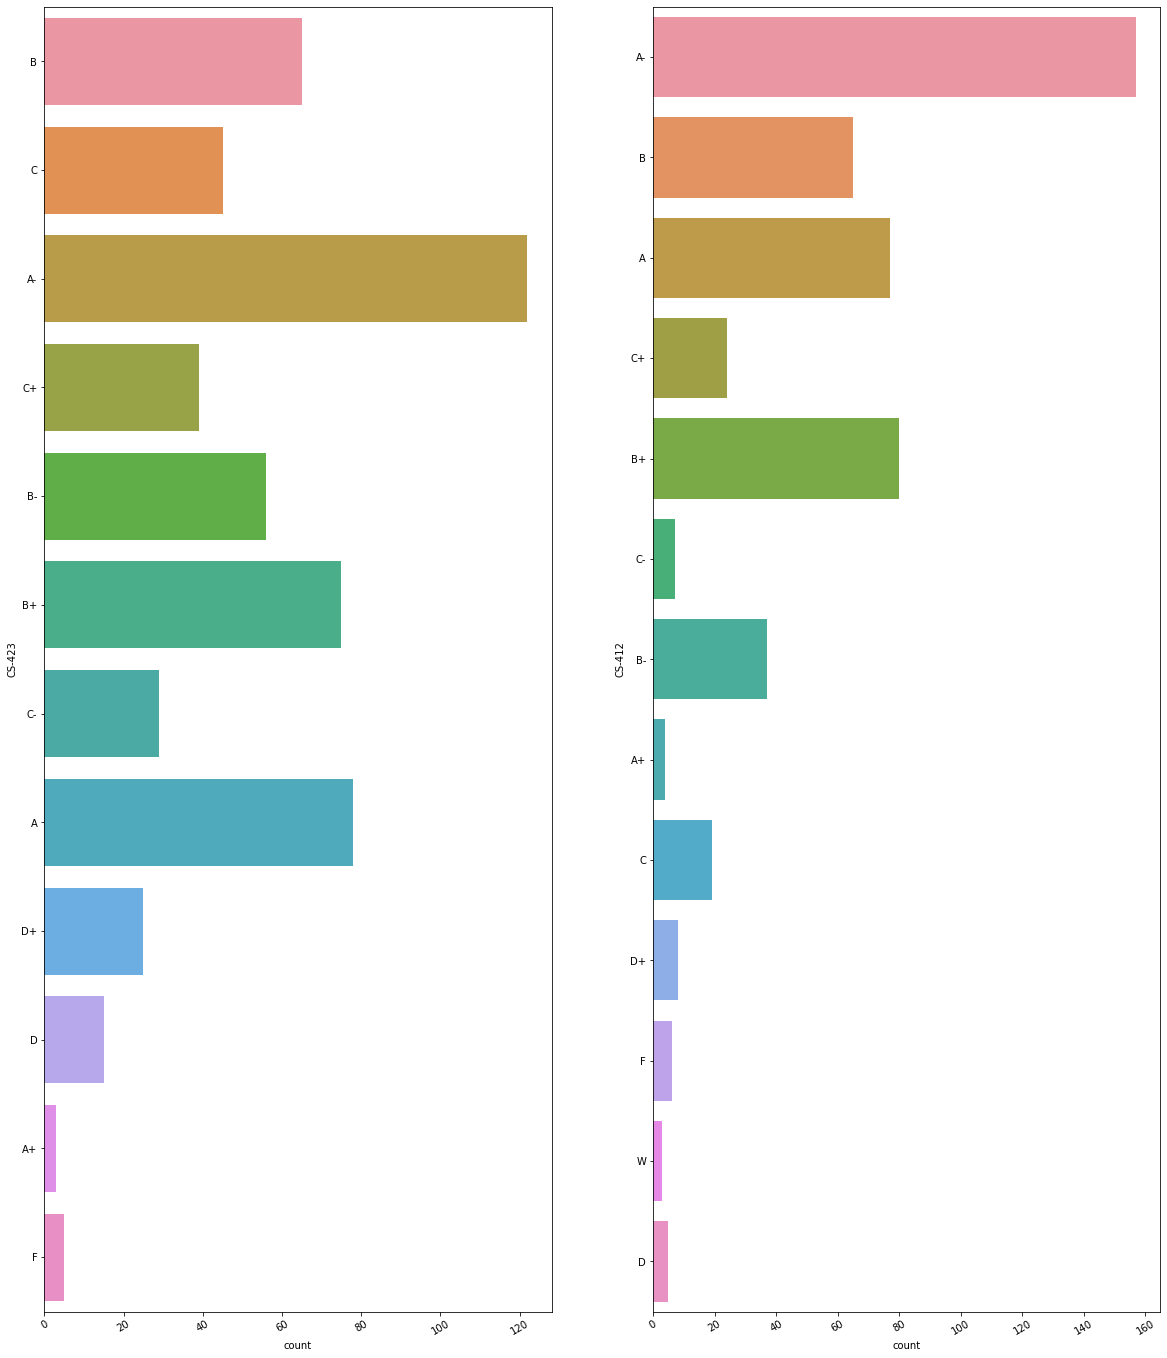

In [25]:
# Lets plot 40 to 42 columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data.columns[40:42]:
    plt.subplot(1,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
plt.show()


# Lets plot by Department and Year Wise

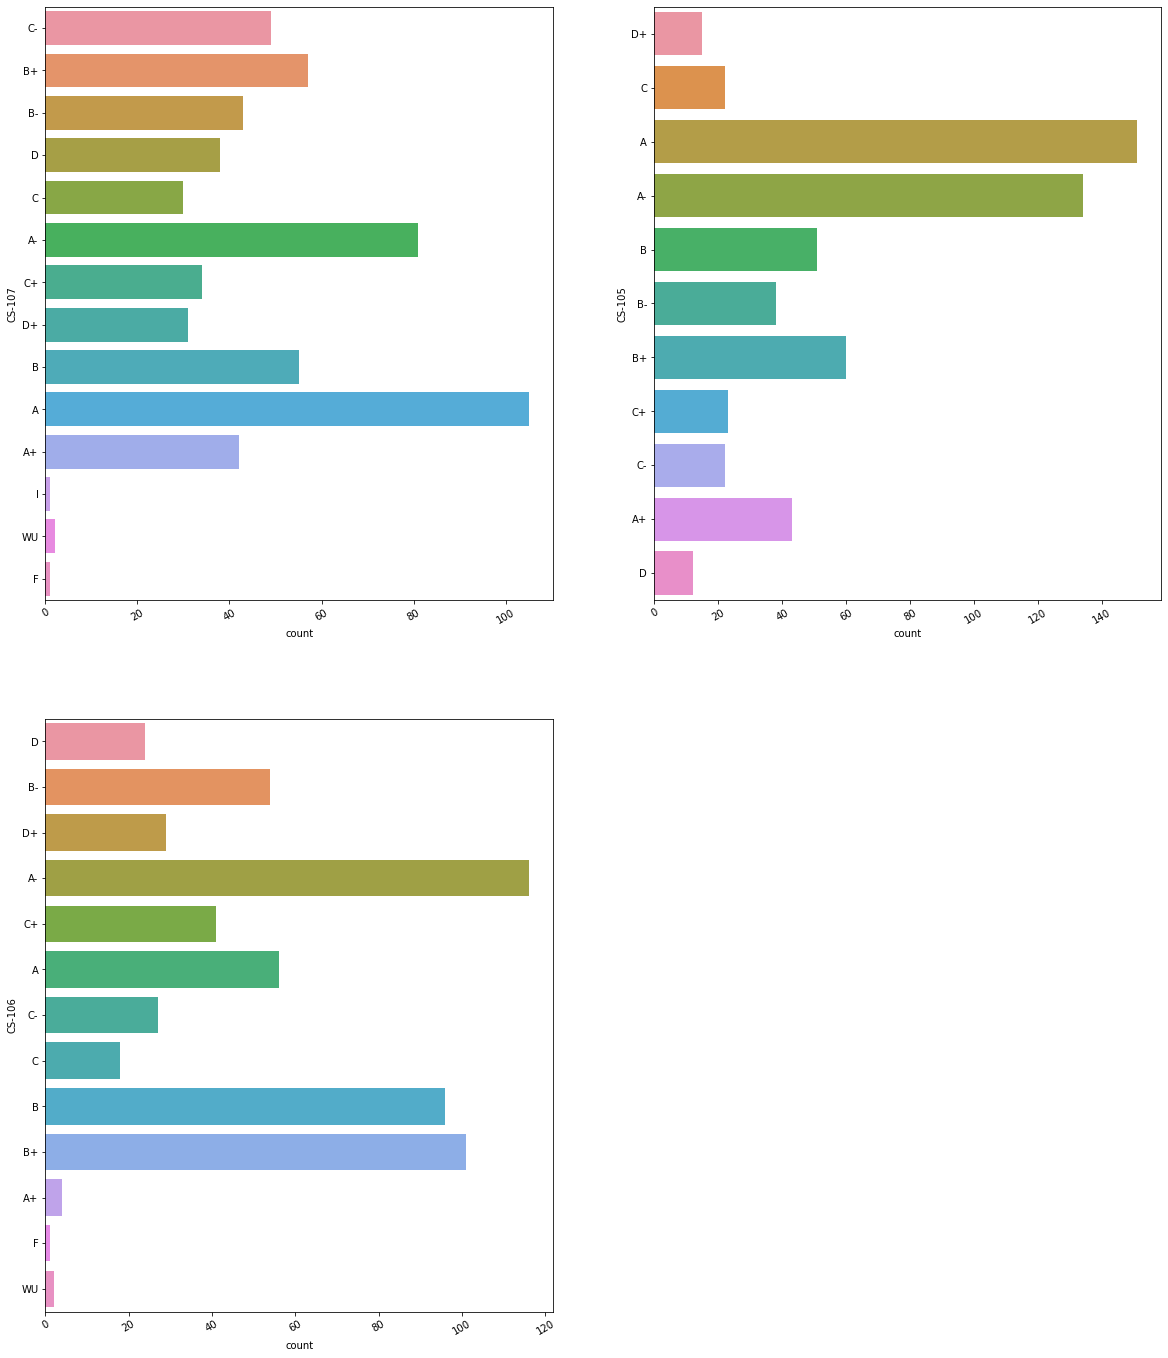

In [26]:
# Lets plot 1st Year CS Student  columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['CS-107','CS-105','CS-106']]:
    plt.subplot(2,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    
plt.show()


# Observation 

First year student in CS branch grades By subject Code

CS-107


A     -->  105 Students


A-    -->   81 Students


B+    -->   57 Students


B     -->   55 Students


C-    -->   49 Students


B-    -->   43 Students


A+    -->   42 Students


D     -->   38 Students


C+    -->   34 Students


D+    -->   31 Students


C     -->   30 Students


WU    -->    2 Students


I     -->    1 Students


F     -->    1 Students

Total - 569 Students
 
 
 # CS-107
 
 
A  ->   151 Students


A- ->   134 Students


B+ ->    60 Students


B  ->    51 Students


A+ ->    43 Students


B- ->    38 Students


C+ ->    23 Students


C  ->    22 Students


C- ->    22 Students


D+ ->    15 Students


D  ->    12 Students


Total - 571 Students


#  CS-105


A-   -> 116 Students


B+   -> 101 Students


B    ->  96 Students


A    ->  56 Students


B-   ->  54 Students


C+   ->  41 Students


D+   ->  29 Students


C-   ->  27 Students


D    ->  24 Students


C    ->  18 Students


A+   ->   4 Students


WU   ->   2 Students


F    ->   1 Students


Total - 569 Students





In [27]:
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

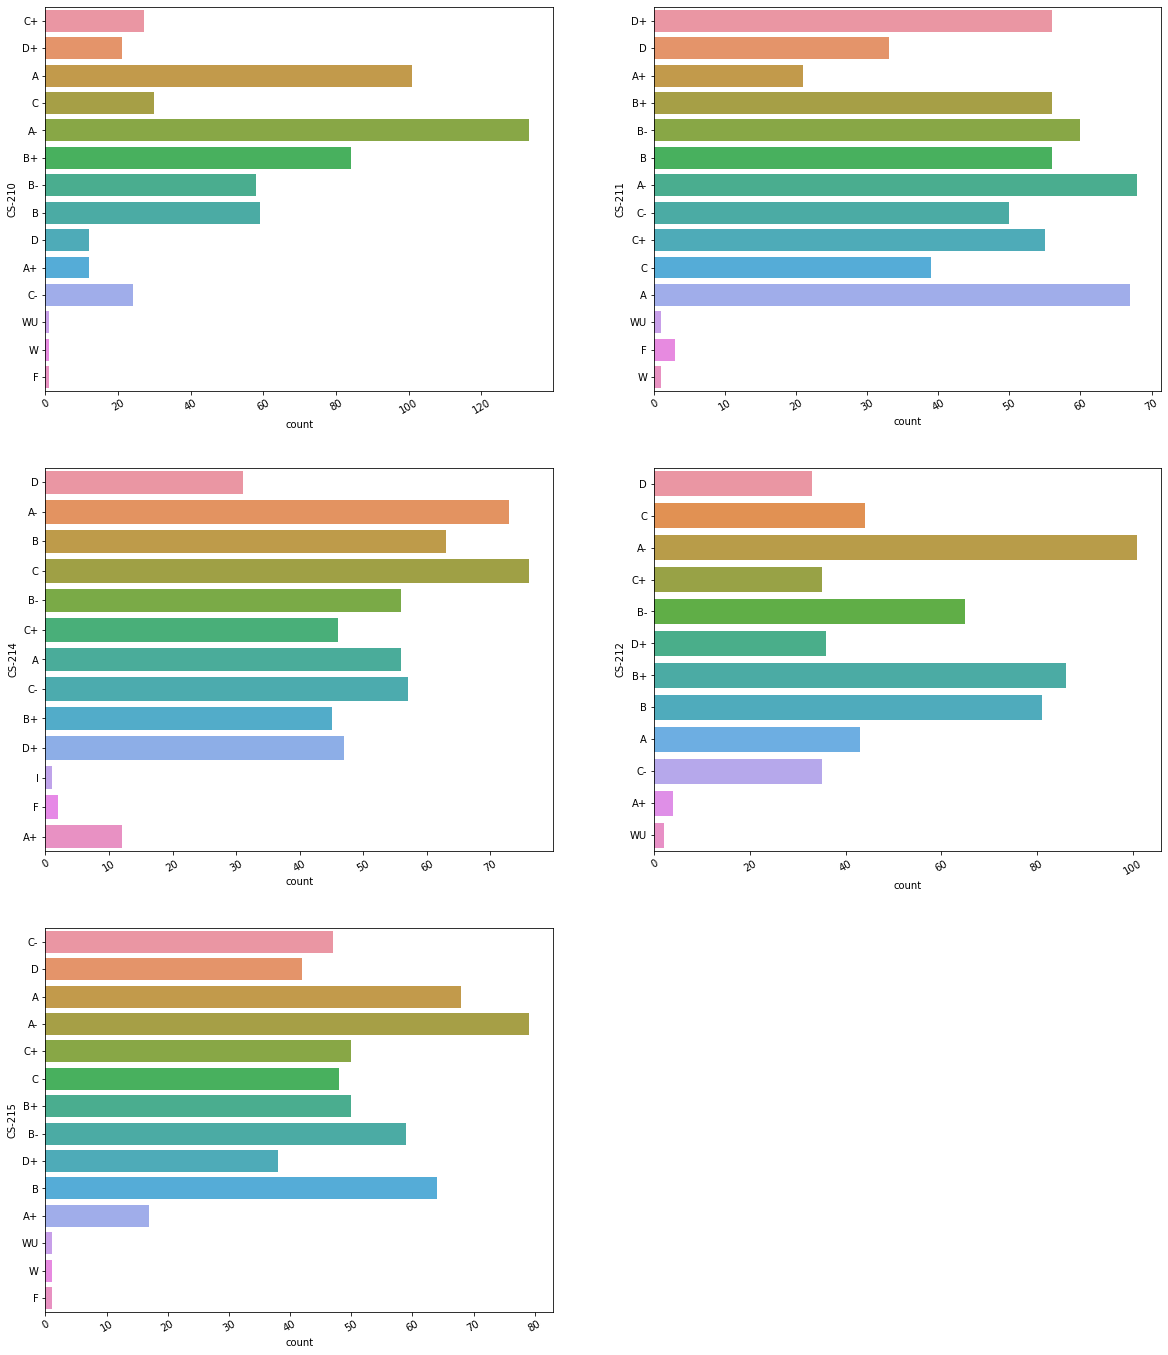

In [28]:
# Lets plot 2nd Year CS Student  columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['CS-210','CS-211','CS-214','CS-212','CS-215']]:
    plt.subplot(3,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    
plt.show()


# Observations

# 'CS-210'

A-  ->  133 Students


A   ->  101 Students


B+  ->   84 Students


B   ->   59 Students


B-  ->   58 Students


C   ->   30 Students


C+  ->   27 Students


C-  ->   24 Students


D+  ->   21 Students


D   ->   12 Students


A+  ->   12 Students


WU  ->    1 Students


W   ->    1 Students


F   ->    1 Students



Total - 564 Students.


#  CS-211


A-  ->  68 Students


A   ->  67 Students


B-  ->  60 Students


D+  ->  56 Students


B+  ->  56 Students


B   ->  56 Students


C+  ->  55 Students


C-  ->  50 Students


C   ->  39 Students


D   ->  33 Students


A+  ->  21 Students


F   ->   3 Students


WU  ->   1 Students


W   ->   1 Students


Total Students - 566 Students


# CS-214

C   ->   76 Students


A-  ->   73 Students


B   ->   63 Students


C-  ->   57 Students


B-  ->   56 Students


A   ->   56 Students


D+  ->   47 Students


C+  ->   46 Students


B+  ->   45 Students


D   ->   31 Students


A+  ->   12 Students


F   ->    2 Students


I   ->    1 Students


Total - 565 Students



# CS-212


A-   ->  101 Students


B+   ->   86 Students


B    ->   81 Students


B-   ->   65 Students


C    ->   44 Students


A    ->   43 Students


D+   ->   36 Students


C+   ->   35 Students


C-   ->   35 Students


D    ->   33 Students


A+   ->    4 Students


WU   ->    2 Students


Total  - > 565 Students


# CS-215


A-   -> 79 Students


A    -> 68 Students


B    -> 64 Students


B-   -> 59 Students


C+   -> 50 Students


B+   -> 50 Students


C    -> 48 Students


C-   -> 47 Students


D    -> 42 Students


D+   -> 38 Students


A+   -> 17 Students


WU   ->  1 Students


W    ->  1 Students


F    ->  1 Students

 Total - 215 Students

A-    108

B+     74

B      71

A      66

B-     60

C      41

C+     37

C-     36

D      29

D+     29

A+      9

F       1

Name: CS-301, dtype: int64

561

A-    89

B-    69

B     68

B+    65

C     53

C+    49

A     42

C-    40

D     36

D+    29

F     10

A+     6

WU     5

W      1

Name: CS-318, dtype: int64

562

A-    113

B     102

A      86

B+     81

B-     60

C+     32

C      28

D      21

C-     19

D+     10

A+      9

Name: CS-302, dtype: int64

561

A-    89

B-    69

B     68

B+    65

C     53

C+    49

A     42

C-    40

D     36

D+    29

F     10

A+     6

WU     5

W      1

Name: CS-318, dtype: int64

562

A-    120

B+     75

A      74

B-     64

B      53

C-     40

C      37

C+     36

D      31

D+     18

A+     10

F       3

WU      1

Name: CS-306, dtype: int64

562

A+    93

A     86

A-    63

D+    52

C     48

C-    44

B+    42

B     37

C+    37

B-    36

D     19

F      2

W      1

WU     1

Name: CS-312, dtype

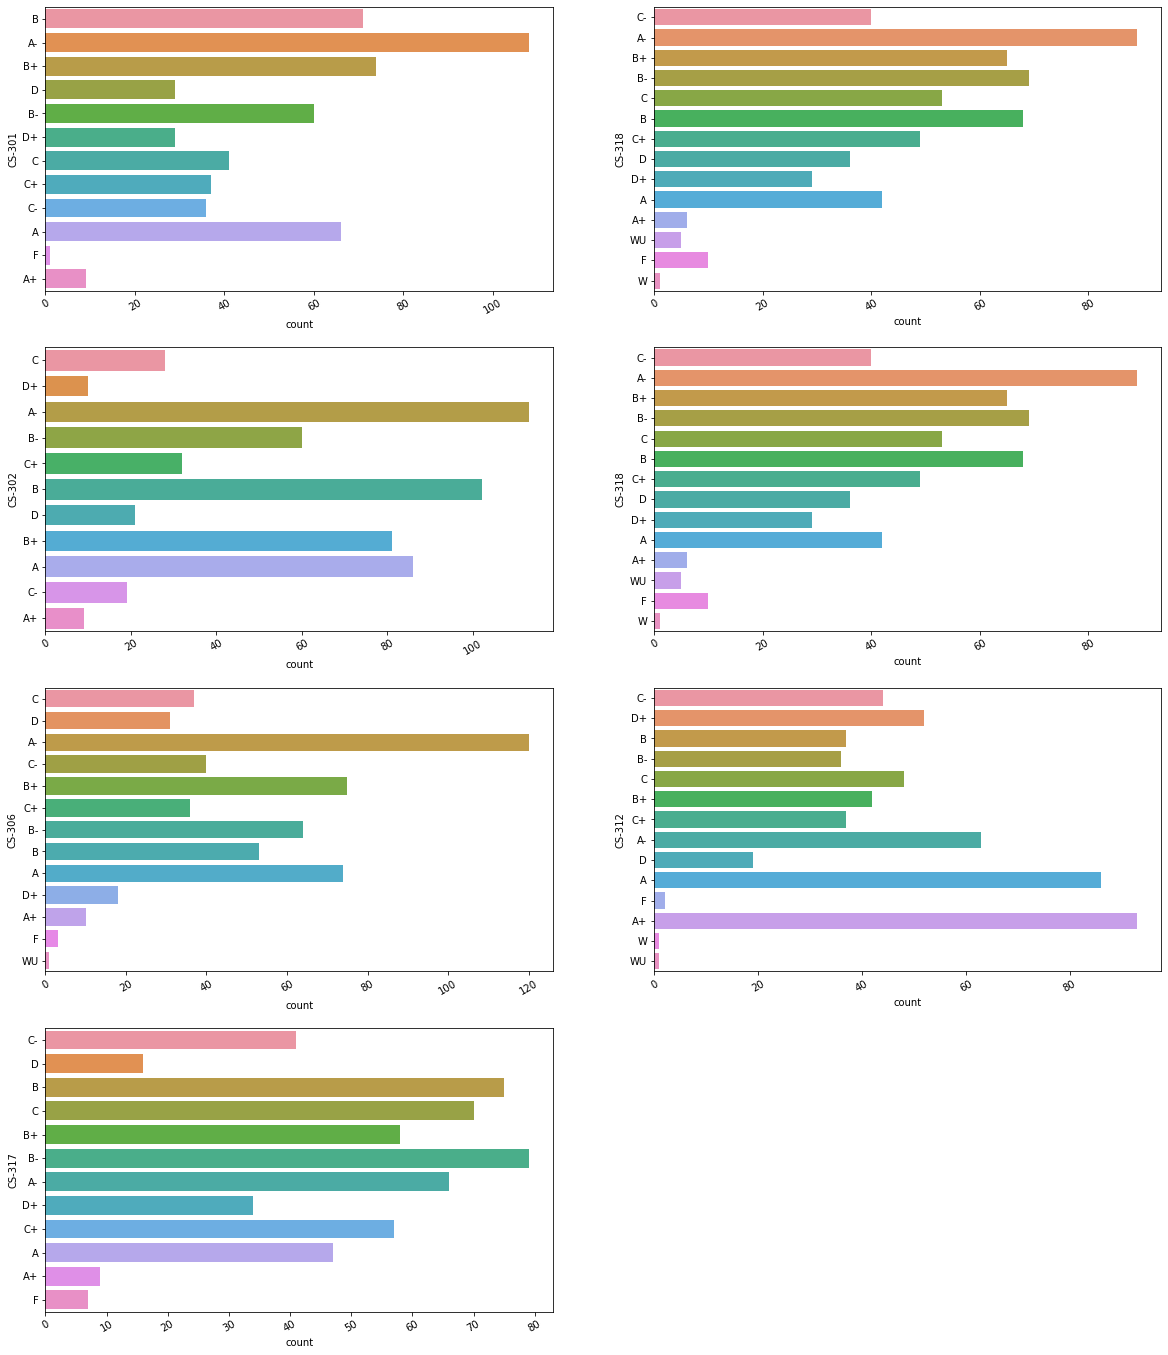

In [29]:
# Lets plot 3nd Year CS Student  columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['CS-301','CS-318','CS-302','CS-318','CS-306','CS-312','CS-317']]:
    plt.subplot(4,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


A     133

A-    106

B+     62

B-     55

B      54

D+     35

C      33

C+     32

C-     30

A+     15

D       4

Name: CS-403, dtype: int64

559

B     86

B-    74

C     68

C+    61

C-    60

B+    60

A-    47

D+    36

A     25

D     21

F     17

A+     2

W      2

Name: CS-421, dtype: int64

559

A-    177

A      79

B+     64

B      58

B-     22

C+     22

C      19

D+     14

C-      8

A+      8

F       6

D       5

W       3

WU      1

Name: CS-406, dtype: int64

486

A     176

A-    156

B+     62

B      54

B-     21

A+     21

C+     21

C      20

C-     12

F       7

D+      3

D       3

W       2

Name: CS-414, dtype: int64

558

A-    120

B      89

B+     85

B-     78

A      56

C+     46

C      40

C-     20

D+     13

D       7

A+      2

F       2

Name: CS-419, dtype: int64

558

A-    122

A      78

B+     75

B      65

B-     56

C      45

C+     39

C-     29

D+     25

D      15

F       5

A+      3

Name: CS-423, dtype: in

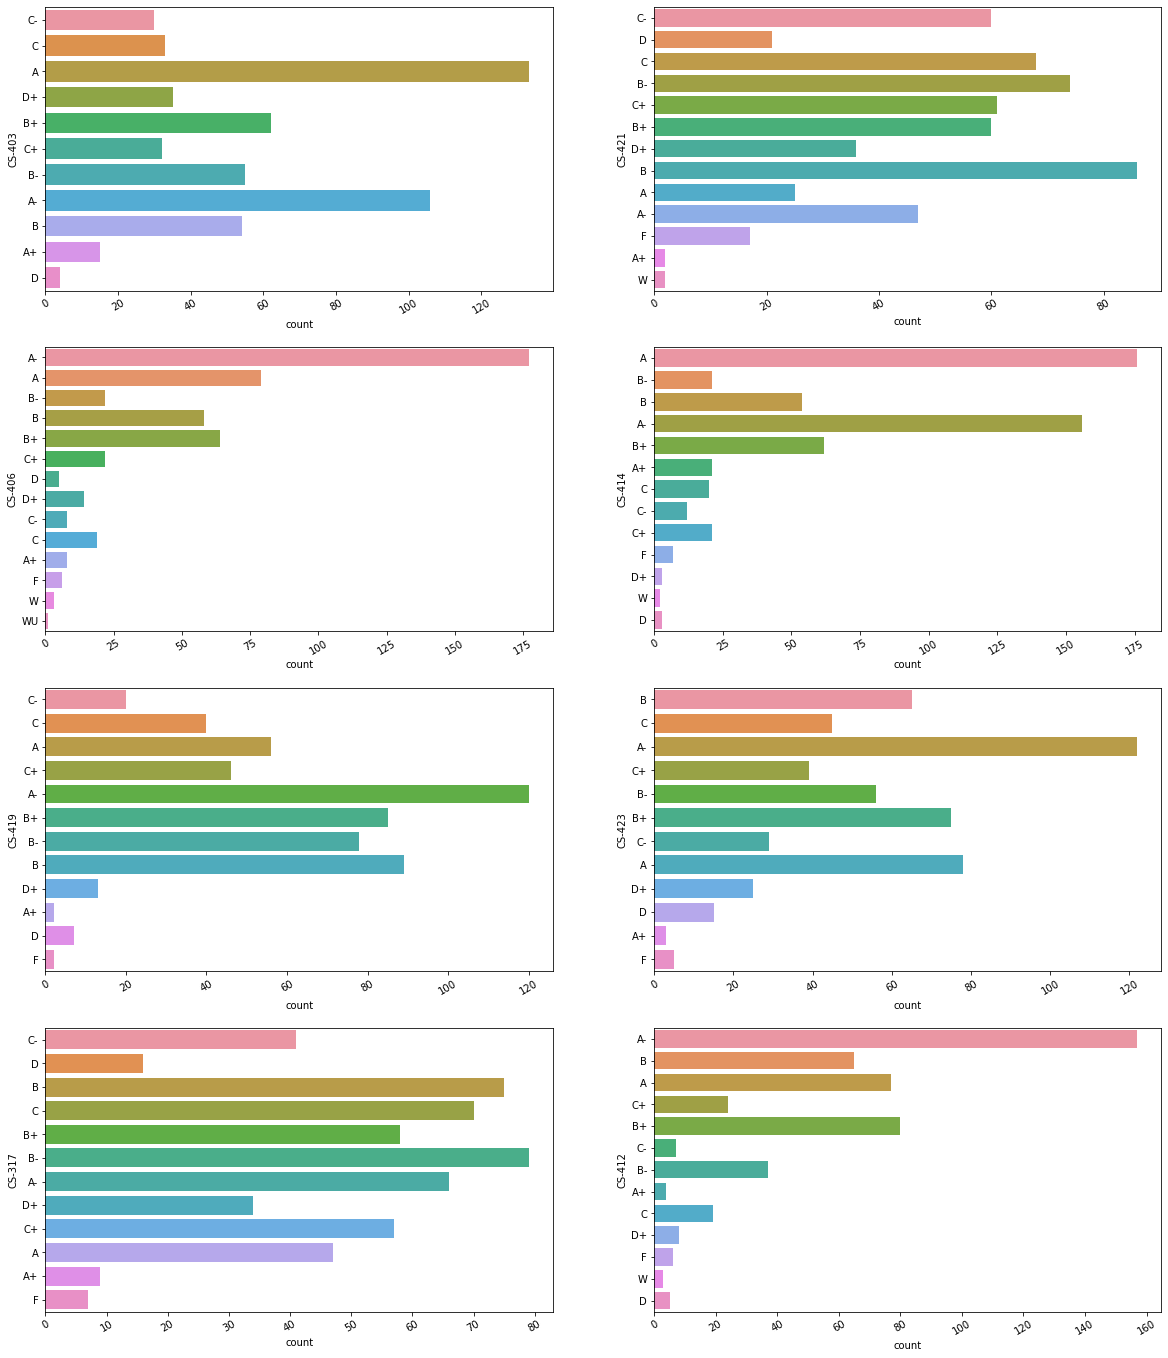

In [30]:
# Lets plot 4th Year CS Student  columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['CS-403','CS-421','CS-406','CS-414','CS-419','CS-423','CS-317','CS-412']]:
    plt.subplot(4,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


In [31]:
data.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

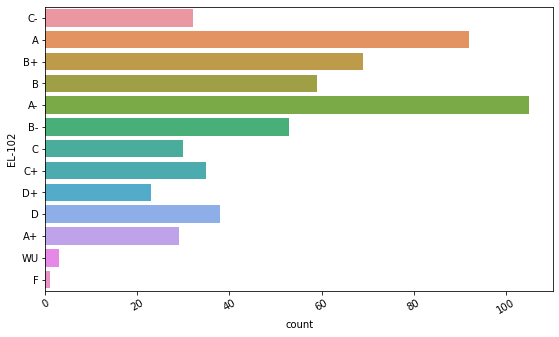

In [32]:
# Lets plot 1st Year EL Department Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['EL-102']]:
    plt.subplot(4,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    
    
plt.show()


# Observation

# EL-102  


A-  ->   105 Students



A   ->    92 Students



B+  ->    69 Students



B   ->    59 Students



B-  ->    53 Students



D   ->    38 Students



C+  ->    35 Students



C-  ->    32 Students



C   ->    30 Students



A+  ->    29 Students



D+  ->    23 Students



WU  ->     3 Students



F   ->     1 Students


Total -> 569 Students




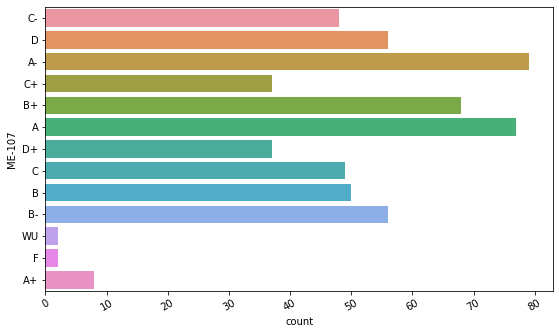

In [33]:
# Lets plot 1st Year ME Department Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['ME-107']]:
    plt.subplot(4,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    
    
plt.show()


#  Observations

# ME-107


A-   ->  79 Students


A    ->  77 Students


B+   ->  68 Students


D    ->  56 Students


B-   ->  56 Students


B    ->  50 Students


C    ->  49 Students


C-   ->  48 Students


C+   ->  37 Students


D+   ->  37 Students


A+   ->   8 Students


WU   ->   2 Students


F    ->   2 Students


Total - 569 Students

A-    86

A     80

D     66

B     61

B-    52

D+    46

C     43

B+    42

C+    39

C-    30

A+    16

F      3

WU     1

W      1

Name: MT-222, dtype: int64

566

A-    120

A      80

B+     65

B      57

B-     49

C-     43

C+     39

D+     37

D      31

C      30

A+     10

WU      1

W       1

F       1

Name: MT-224, dtype: int64

564


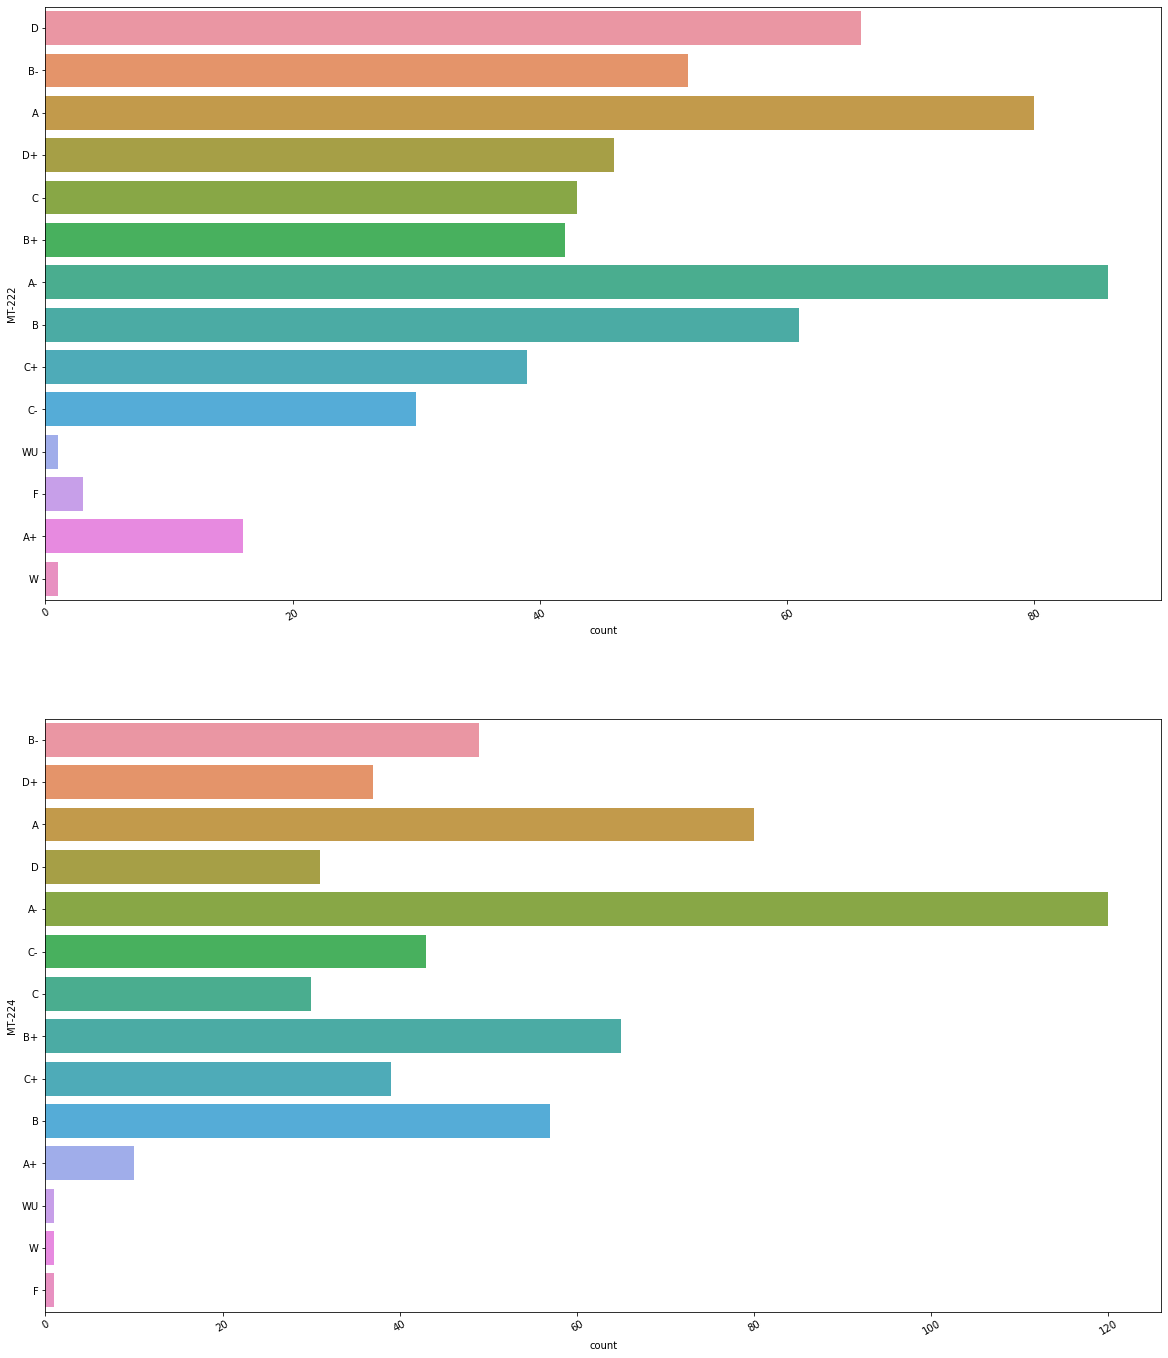

In [34]:
# Lets plot 2nd Year MT Department Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['MT-222','MT-224']]:
    plt.subplot(2,1,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


A     118

A-    103

B+     64

B      57

B-     46

C-     32

D+     31

A+     30

C      28

C+     27

D      22

F       4

Name: MT-331, dtype: int64

562


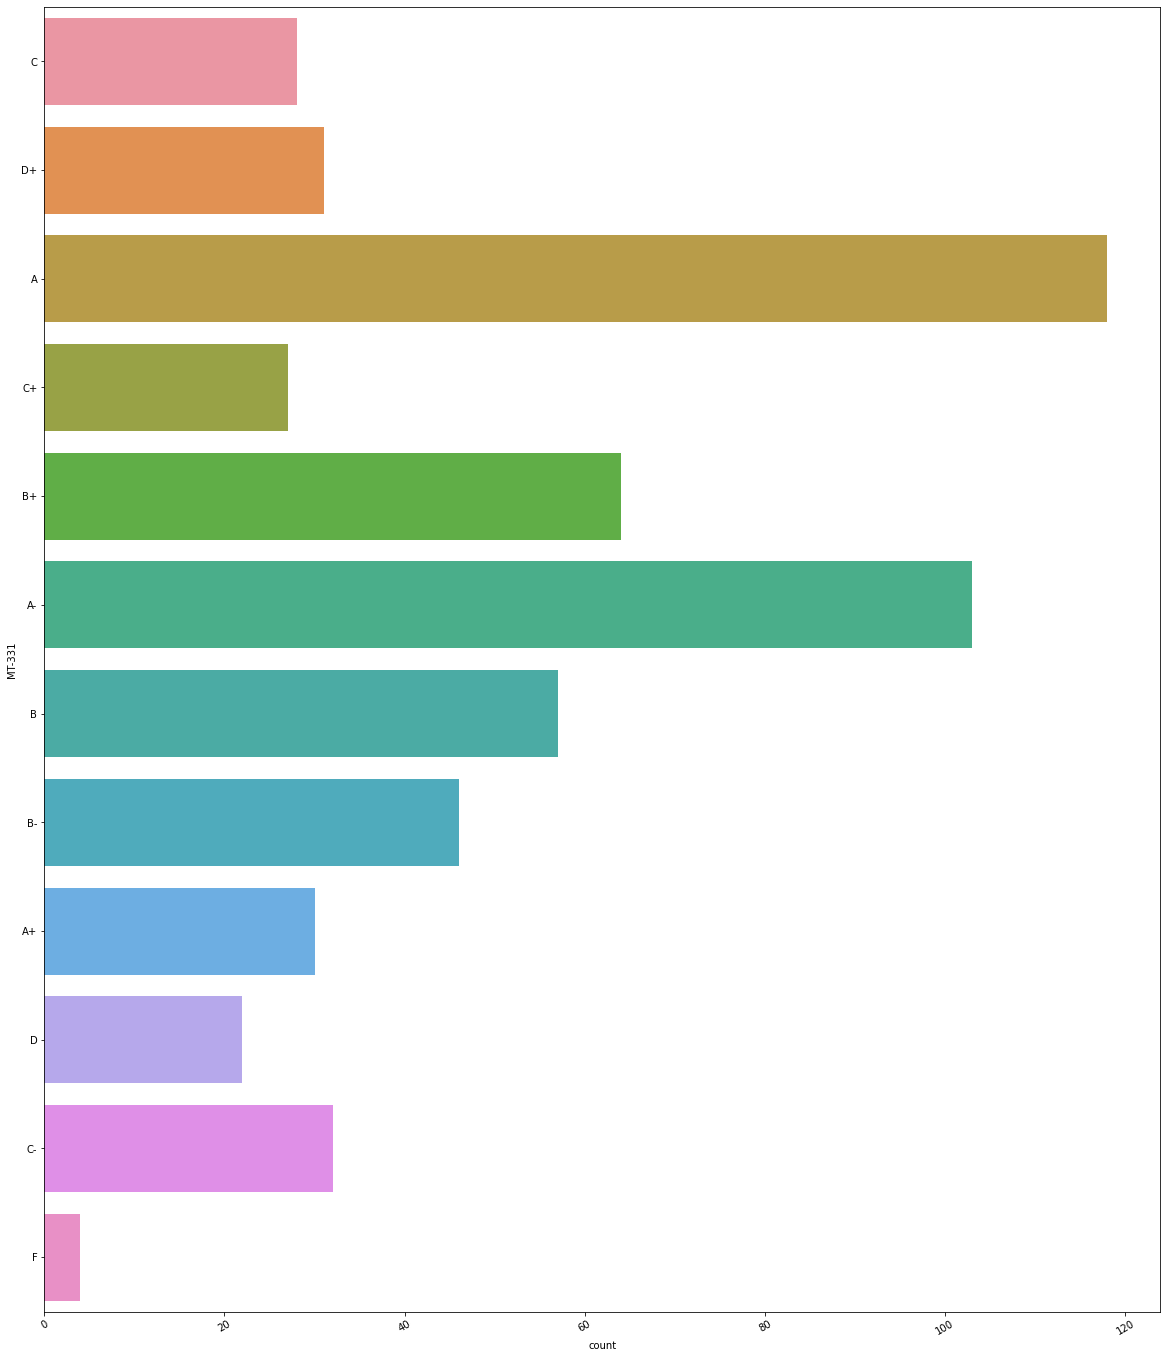

In [35]:
# Lets plot 3rd Year MT Department Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['MT-331']]:
    plt.subplot(1,1,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


A-    140

A     130

B+     65

B      47

A+     39

B-     30

C-     28

C+     24

C      24

D      20

D+     13

F       1

Name: MT-442, dtype: int64

561


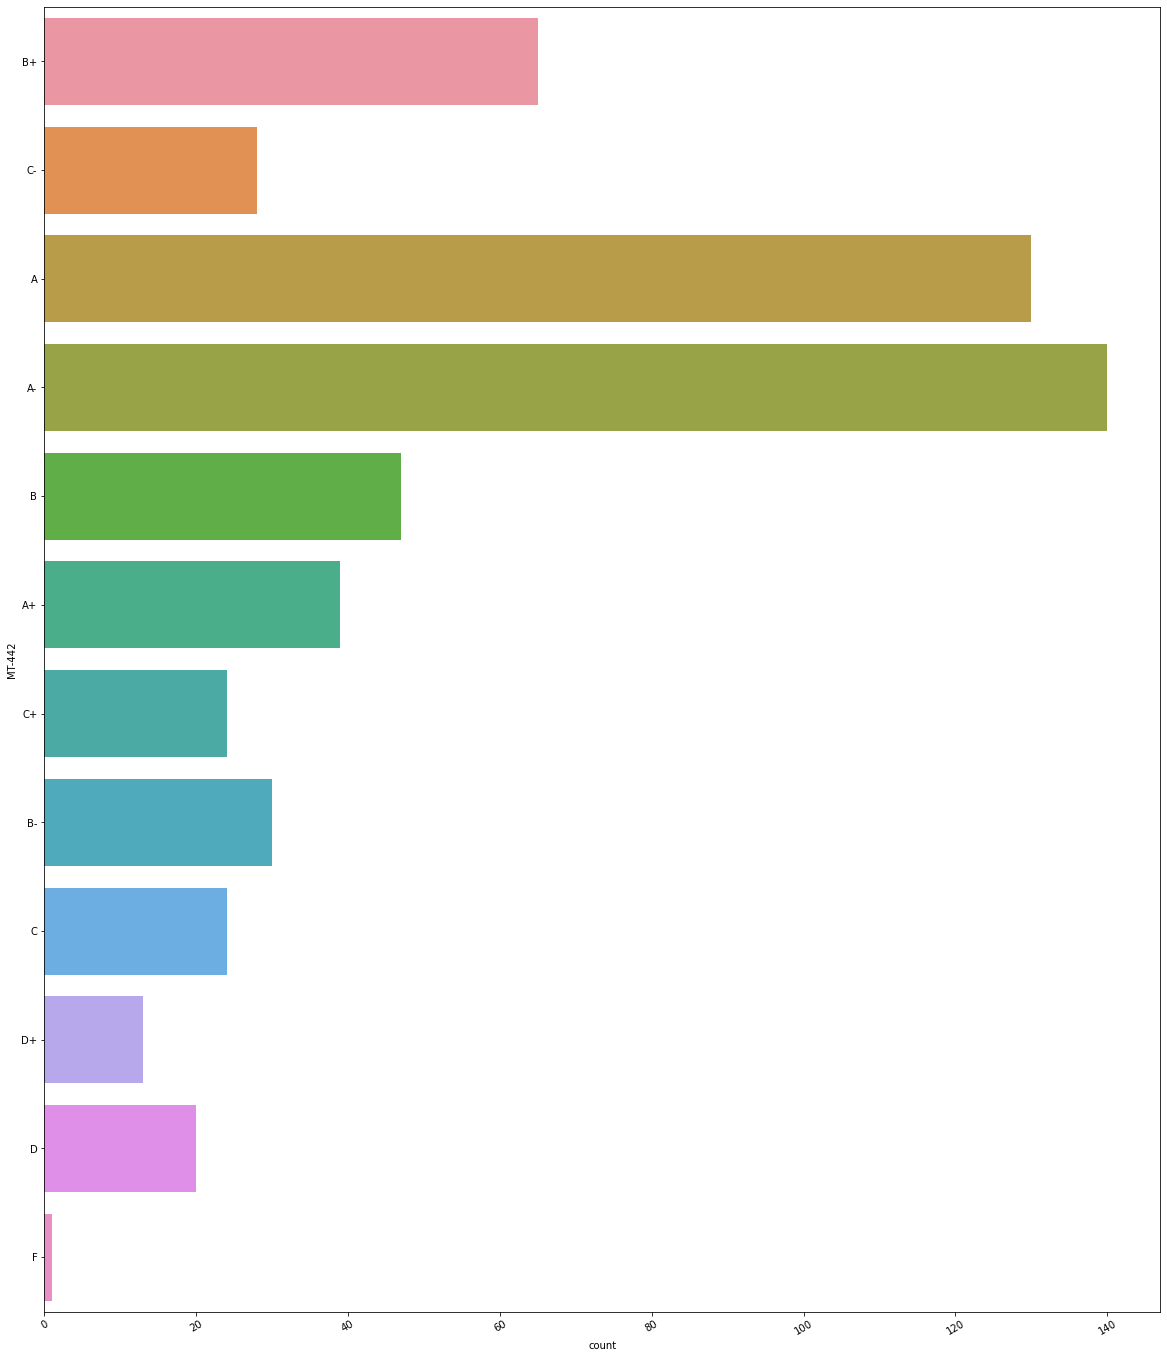

In [36]:
# Lets plot 4th Year MT Department Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['MT-442']]:
    plt.subplot(1,1,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


A-    137

B+     83

B      77

A      68

B-     48

C      48

C+     38

D+     26

C-     26

D      11

A+      6

WU      1

Name: EE-119, dtype: int64

569


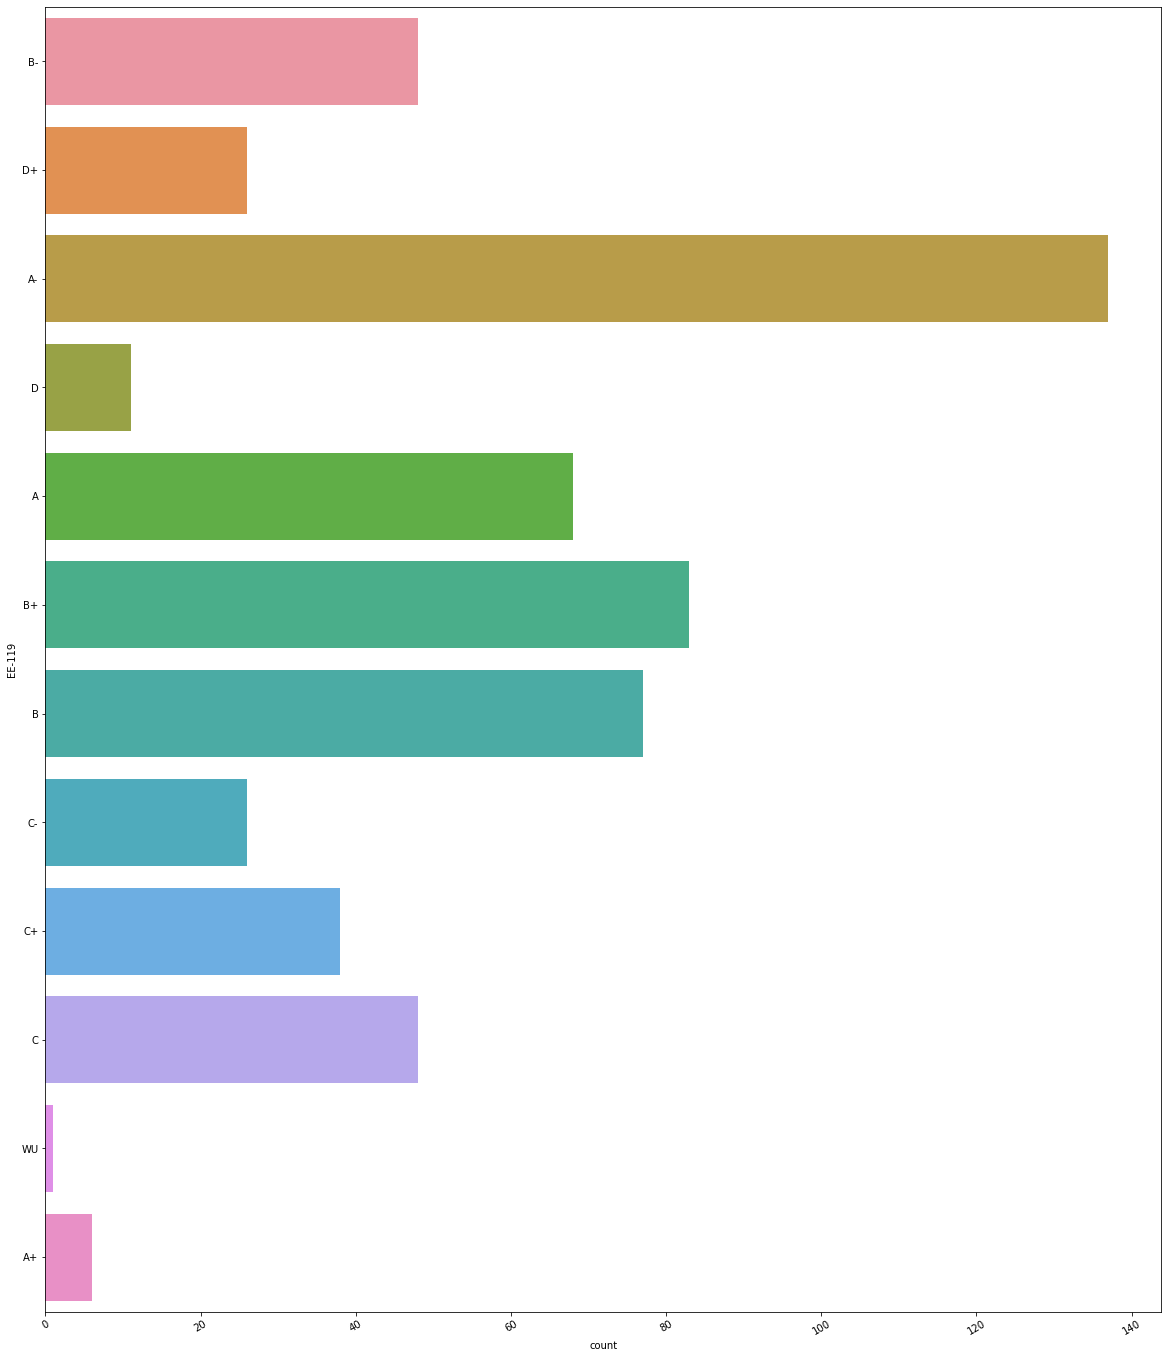

In [37]:
# Lets plot 1st Year EE Department Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['EE-119']]:
    plt.subplot(1,1,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


A-    137

A      97

B+     70

B      63

B-     57

C      36

C+     29

A+     22

C-     20

D+     19

D      12

F       2

WU      1

Name: EE-217, dtype: int64

565

A     122

A-    121

B+     65

B      53

C      39

B-     35

A+     32

C+     29

D      25

D+     21

C-     16

F       4

W       2

Name: EE-222, dtype: int64

564


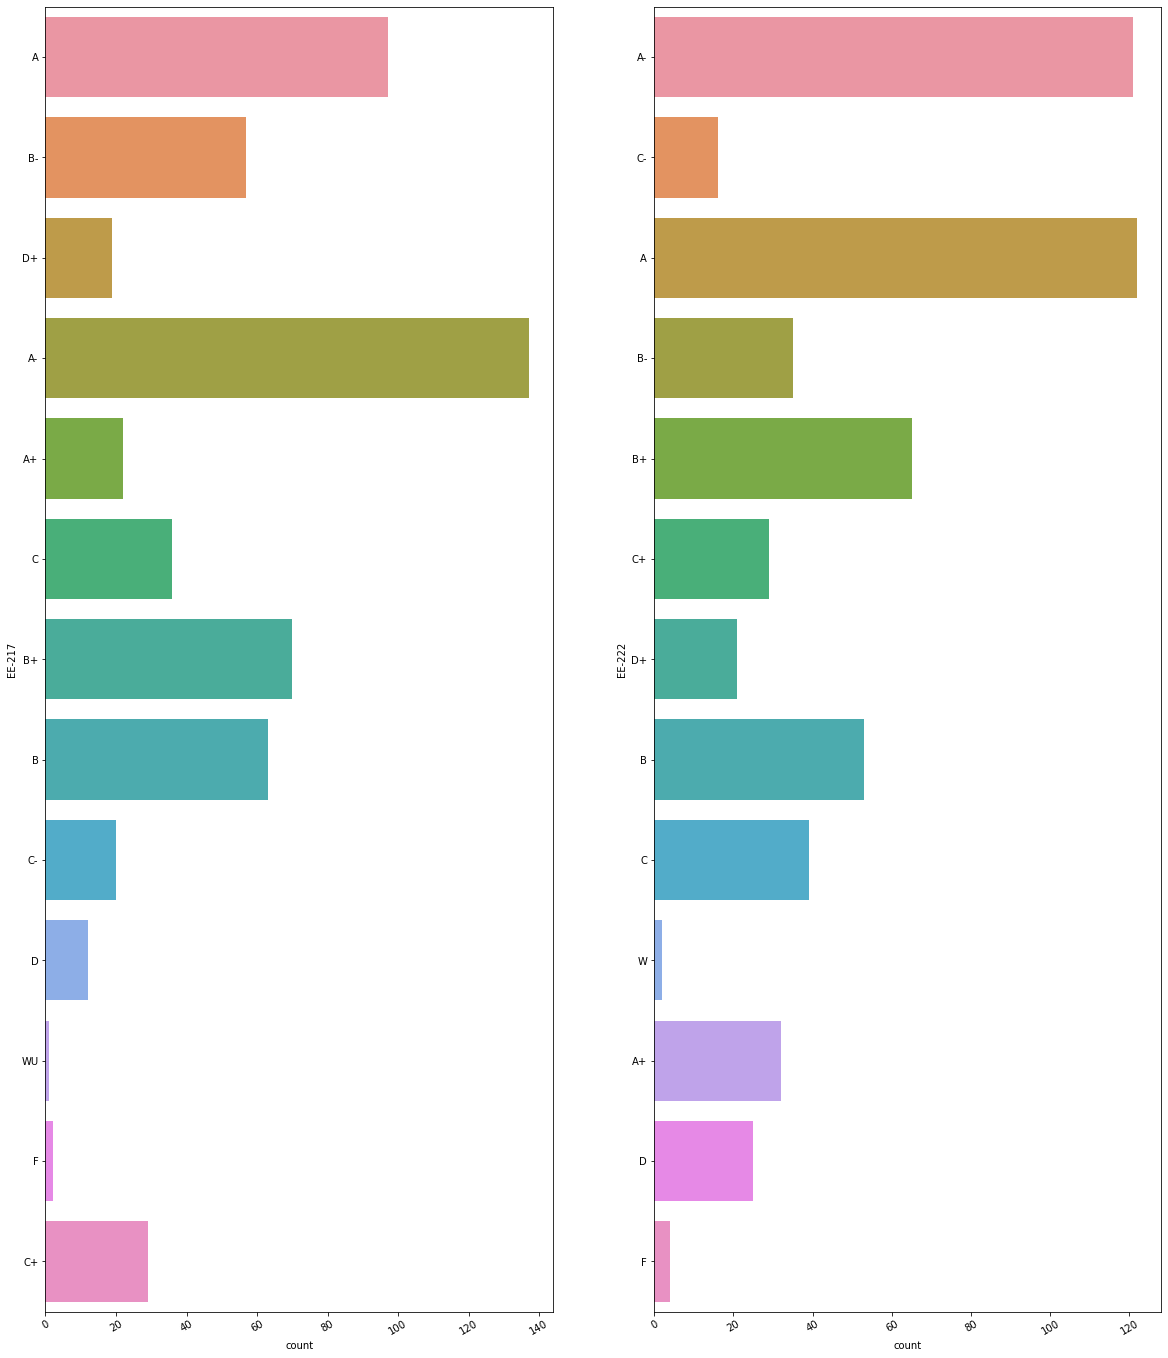

In [38]:
# Lets plot 2ND Year EE Department Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['EE-217','EE-222']]:
    plt.subplot(1,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


A-    96

A     76

B+    68

B     67

B-    62

C     49

C+    38

C-    32

D+    22

D     22

A+    20

F      9

WU     1

Name: EL-332, dtype: int64

562


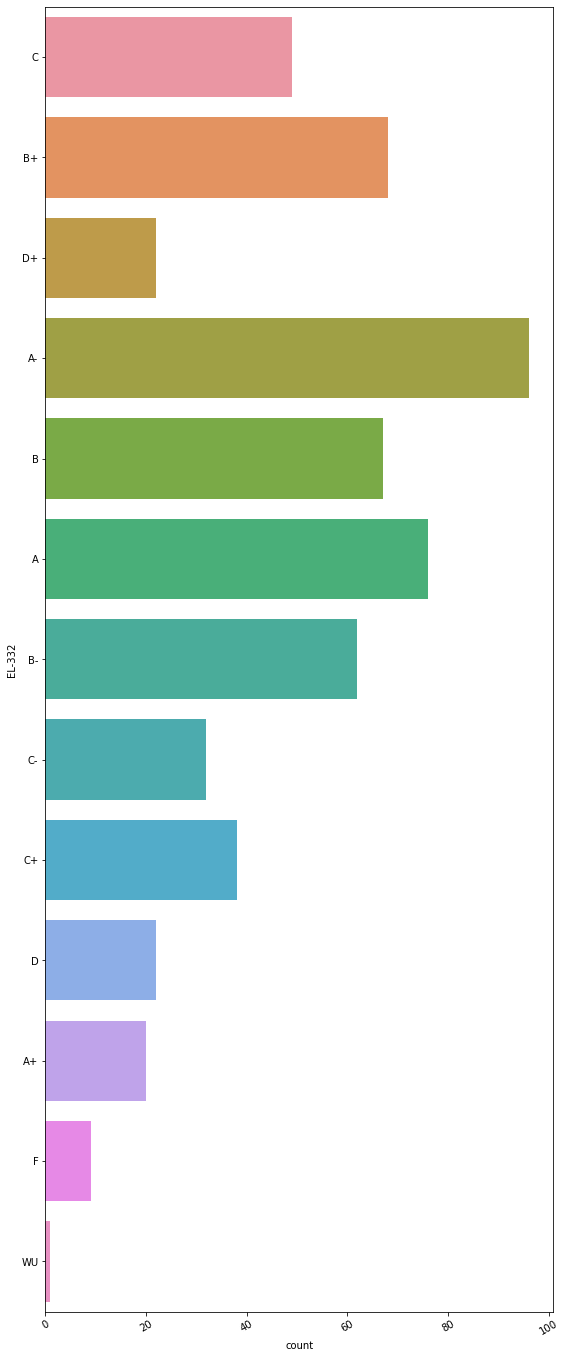

In [39]:
# Lets plot 3d Year ELDepartment Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['EL-332']]:
    plt.subplot(1,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


B     112

B-     92

C      61

B+     59

C+     58

C-     56

D+     49

A-     38

D      19

A      14

F       2

WU      1

Name: EF-303, dtype: int64

561


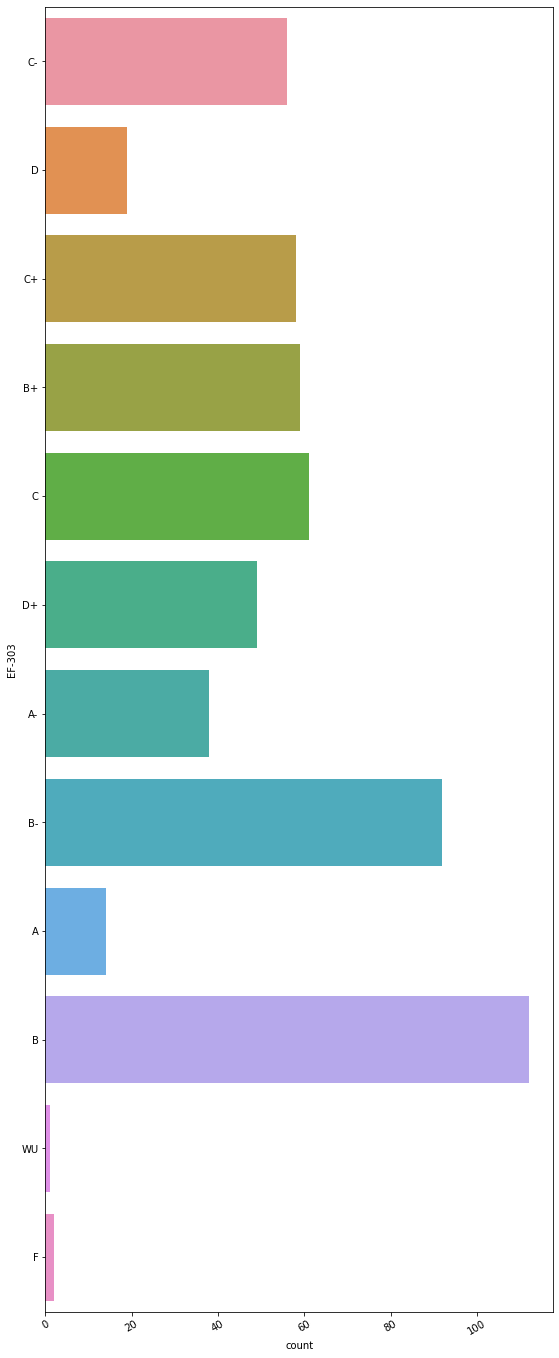

In [40]:
# Lets plot 3rd Year EF Department Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['EF-303']]:
    plt.subplot(1,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


In [41]:
data.columns 

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

A-    150

A     118

B      97

B+     89

B-     36

C+     33

C      15

C-     11

D+      9

D       3

A+      2

F       2

WU      1

Name: HS-205/20, dtype: int64

566


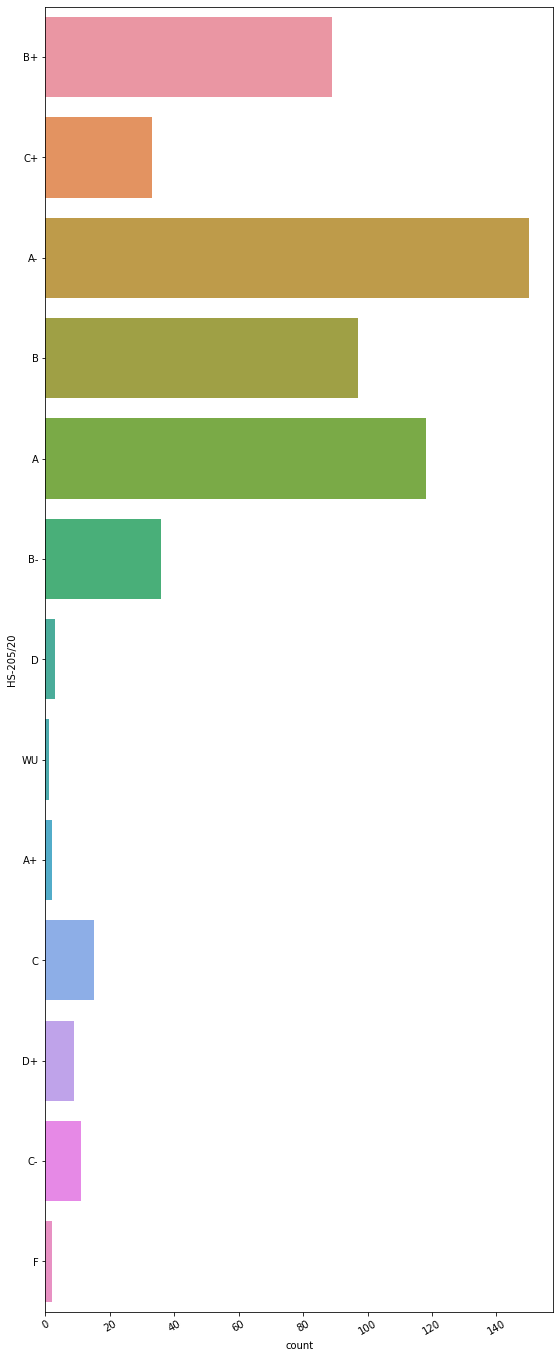

In [42]:
# Lets plot 2nd Year HS Department Student Resul columns in one code .
plt.figure(figsize=(20,24))
plotnumber=1
for col in data[['HS-205/20']]:
    plt.subplot(1,2,plotnumber)
    plotnumber +=1
    ax=sns.countplot(y=data[col])
    plt.xticks(rotation=30)
    print(data[col].value_counts())
    print(data[col].value_counts().sum())
    
plt.show()


# Visualization Part is Over



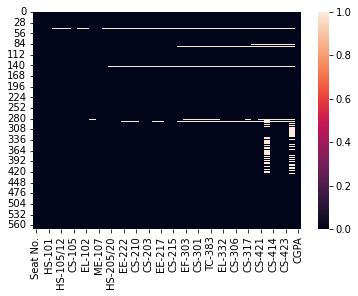

In [43]:
#Lets check nulls  with heat map
sns.heatmap(data.isna())
plt.show()

In [44]:
#So we have lots of null values


In [45]:
#Lets check how much null values we have
data.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Almost all columns have null values . Lets count how much total null values

In [46]:
data.isna().sum().sum()

425

So we have total 425 null values lets treat them using pd.dummies method

# Data Preprocessing

In [47]:
#First encode the dataset
#Lets use encoding technique and convert all categorical data to numerical data
#First filter categorical column
numeric=['int8','int16','int32','int64','float','float32','float64']
categorical_column=[]
feature=data.columns.values.tolist()

for col in feature:
    if data[col].dtype in numeric:
        continue
    categorical_column.append(col)
categorical_column

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412']

In [48]:
df_dummies=pd.get_dummies(data[categorical_column],drop_first=True)
df_dummies.head()

,Seat No._CS-97002,Seat No._CS-97003,Seat No._CS-97004,Seat No._CS-97005,Seat No._CS-97006,Seat No._CS-97007,Seat No._CS-97008,Seat No._CS-97009,Seat No._CS-97010,Seat No._CS-97011,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Lets join with DataFrame
data=data.join(df_dummies)

In [50]:
#Lets drop unwanted column (Like categorical column)
data.drop(columns=categorical_column,axis=1,inplace=True)

In [51]:
data.head()

,CGPA,Seat No._CS-97002,Seat No._CS-97003,Seat No._CS-97004,Seat No._CS-97005,Seat No._CS-97006,Seat No._CS-97007,Seat No._CS-97008,Seat No._CS-97009,Seat No._CS-97010,...,CS-412_B,CS-412_B+,CS-412_B-,CS-412_C,CS-412_C+,CS-412_C-,CS-412_D,CS-412_D+,CS-412_F,CS-412_W
0,2.205,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.008,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3.608,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.906,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,3.448,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Lets check null values for confitming
data.isna().sum().sum()

We dont have any null values . we are good to proceed.

We dont check multicollinearity problem beacuse in this dataset every marks is important and all are responsible for CGPA.



Here we dont need to check the Data Descriptions . Because we have all categorical data .

In [53]:
#lets do Feature Selection Test Using PCA
from sklearn.decomposition import PCA

We , have to Standarize our data because PCA need Standard Data

# Dividing data in feature and vectors

In [54]:
x=data.drop(columns='CGPA')#Feature
y=data.CGPA#Target

# Lets Standardize the feature data

In [59]:
#Lets import standardscaler
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.04188539, -0.04188539, -0.04188539, ..., -0.11920399,
        -0.10305081, -0.07267524],
       [23.87467277, -0.04188539, -0.04188539, ..., -0.11920399,
        -0.10305081, -0.07267524],
       [-0.04188539, 23.87467277, -0.04188539, ..., -0.11920399,
        -0.10305081, -0.07267524],
       ...,
       [-0.04188539, -0.04188539, -0.04188539, ..., -0.11920399,
        -0.10305081, -0.07267524],
       [-0.04188539, -0.04188539, -0.04188539, ..., -0.11920399,
        -0.10305081, -0.07267524],
       [-0.04188539, -0.04188539, -0.04188539, ..., -0.11920399,
        -0.10305081, -0.07267524]])

In [57]:
#Lets assign PCA in one Variable and apply on Scaled Data
pca=PCA()
pca.fit_transform(x_scaled)

array([[ 5.73295074e+00, -9.43827114e-01,  4.83681524e-01, ...,
         0.00000000e+00,  1.35809412e+01,  1.63225568e-15],
       [ 8.23438591e+00, -8.99046842e-01,  3.15823859e+00, ...,
         3.30498680e-01,  2.99655748e-01,  1.63225568e-15],
       [-3.16501034e+00,  4.38208949e-01, -5.37522992e-02, ...,
        -2.19957548e+00,  4.13184486e-02,  1.63225568e-15],
       ...,
       [-2.94052974e+00,  1.15209640e-01, -9.83699201e-01, ...,
        -7.29910662e-01, -1.23569480e-01,  1.63225568e-15],
       [ 5.36019514e+00, -1.07908601e+00,  1.38121073e+00, ...,
         4.37099516e-01, -3.66435028e-01,  1.63225568e-15],
       [ 7.99032580e+00, -1.35157094e+00,  2.49179230e+00, ...,
         4.26464522e-01,  1.78184788e-02,  1.63225568e-15]])

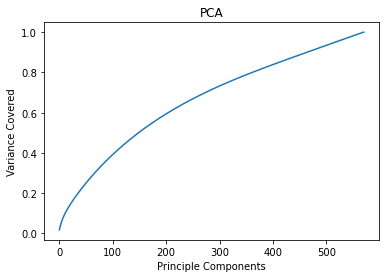

In [60]:
#Lets plot scree plot to check the best components.
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle Components')
plt.ylabel("Variance Covered")
plt.title('PCA')
plt.show()

Around 500 Principle Components are able to to explain >90% Variance . its save to consider starting 500 PC

In [64]:
pca=PCA(n_components=500)
new_pump=pca.fit_transform(x_scaled)
princi_comp=pd.DataFrame(new_pump)
princi_comp

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,5.732951,-0.943827,0.483682,-0.291588,-3.595591,-0.192821,0.141844,-0.684074,-1.408784,1.728119,...,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
1,8.234386,-0.899047,3.158239,-1.001458,-1.564258,-2.257775,-1.409569,0.710062,3.676931,3.582249,...,0.046499,0.155198,-0.253378,-0.190761,-0.146556,-0.042529,0.025205,0.251816,-0.020057,0.427950
2,-3.165010,0.438209,-0.053752,0.047193,0.000442,0.266545,0.591610,0.732757,1.460689,0.271146,...,-0.583538,2.228222,-1.084659,-2.479319,-0.991962,-0.240646,0.852165,-1.747849,1.102263,3.194263
3,8.965243,-1.096784,2.771148,-0.851851,-2.870854,-2.824271,-0.529330,1.561167,1.681426,6.012251,...,0.442793,0.278120,-0.476837,-0.628823,-1.141438,0.070490,-0.416215,0.941293,-0.960577,-0.370439
4,-3.996933,0.091839,-2.165333,0.190518,-1.911770,2.691927,1.433729,1.729237,3.453922,-0.763227,...,-0.396999,0.346713,-0.924201,-1.194570,-0.220520,-0.048584,-1.425149,0.020889,-0.526941,0.166754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-4.553510,1.138563,5.458913,-1.445749,0.200615,0.018153,-0.167095,-0.358839,0.202826,0.413454,...,-0.287047,-1.125031,-0.477163,-1.574129,0.197214,-0.643885,-1.193168,-0.240127,0.296364,0.101770
567,-3.518247,0.894176,4.652973,-1.271458,-0.762337,0.016798,-0.373310,-0.677784,-0.807413,-0.969759,...,-0.237750,0.041608,-0.166173,0.594957,0.105873,-1.149664,0.694272,0.244095,-1.123315,0.132902
568,-2.940530,0.115210,-0.983699,0.298464,2.812194,-1.286140,-0.404306,-0.258486,0.653107,0.332067,...,0.311833,0.484631,0.111726,-0.592352,-1.652836,-1.482284,0.177762,0.618873,-0.189415,0.256436
569,5.360195,-1.079086,1.381211,-0.495257,0.819977,-0.911497,0.200928,-0.400733,0.675383,-1.973971,...,-0.449529,-1.012685,0.290527,0.331008,0.328571,0.103241,0.118355,0.682981,0.475861,-0.019134


# Lets Build a Model

In [65]:
#lets do train test split
#Import train test split
from sklearn.model_selection import train_test_split
#Import Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#Import R2_score
from sklearn.metrics import r2_score,mean_squared_error

In [128]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    x_pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 1.0

 At random state 0 , the testing accuracy is :- 0.9559605500887183





 At random state 1 , the Training accuracy is :- 1.0

 At random state 1 , the testing accuracy is :- 0.9465109486006807





 At random state 2 , the Training accuracy is :- 1.0

 At random state 2 , the testing accuracy is :- 0.9177074663955421





 At random state 3 , the Training accuracy is :- 1.0

 At random state 3 , the testing accuracy is :- 0.9404251911602014





 At random state 4 , the Training accuracy is :- 1.0

 At random state 4 , the testing accuracy is :- 0.9426691373725364





 At random state 5 , the Training accuracy is :- 1.0

 At random state 5 , the testing accuracy is :- 0.9118462485033609





 At random state 6 , the Training accuracy is :- 1.0

 At random state 6 , the testing accuracy is :- 0.9427699011246067





 At random state 7 , the Training accuracy is :- 1.0

 At random state 7 , the testing accuracy is :- 0.92686182133920

Here we can select random state 26

In [131]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.2,random_state=26)

In [132]:
lr.fit(x_train,y_train)

LinearRegression()

In [133]:
#Lets Print Training Score
pred_train=lr.predict(x_train)
print(r2_score(y_train,pred_train))

1.0


In [134]:
#Lets Print Testing Score
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.9530184419982426


# Cross Validation of the Model

In [135]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score

In [136]:
for j in range(2,10):
    cv_score=cross_val_score(lr,princi_comp,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.22381171783953613 and accuracy for training is -0.93857594768885 and accuracy for testing is -0.9176190272076699





At cross fold 3 the CV Score is 0.7973264533365039 and accuracy for training is -0.93857594768885 and accuracy for testing is -0.9176190272076699





At cross fold 4 the CV Score is 0.8716024819314578 and accuracy for training is -0.93857594768885 and accuracy for testing is -0.9176190272076699





At cross fold 5 the CV Score is 0.8921203169345475 and accuracy for training is -0.93857594768885 and accuracy for testing is -0.9176190272076699





At cross fold 6 the CV Score is 0.8540900421975631 and accuracy for training is -0.93857594768885 and accuracy for testing is -0.9176190272076699





At cross fold 7 the CV Score is 0.567976321090051 and accuracy for training is -0.93857594768885 and accuracy for testing is -0.9176190272076699





At cross fold 8 the CV Score is -5.113814260066138e+24 and accuracy for training is -0.9385759

Since the number of folds dont have such impact on the accuracy and cv_score . So cv=5 is selected.

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

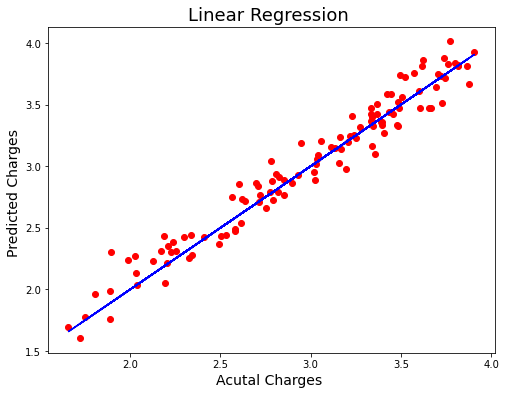

In [137]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

Here we can see that most of the data points pass through the best fit line .

# Regularization -

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [139]:
#lets import Lasso (Least absolute shrinkage and selection operator)
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
#LASSOCV will return best alpha after max iteration
#normalize is subtracting the mean and divide by L2_norm
import warnings
warnings.filterwarnings('ignore')


lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(x_train,y_train)
          
          
          


LassoCV(max_iter=100, normalize=True)

In [140]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

0.0001471896090751525

In [141]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0001471896090751525)

In [142]:
lasso_reg.score(x_train,y_train)#Testing Score

0.9999517096655043

In [143]:
lasso_reg.score(x_test,y_test) #Testing Score

0.9678590874925949

So , With lasso we get 96 % accuracy with testing data

# Using Ridge Regression Model.
Ridge will return best alpha and coefficients after performing 10 Cross validation.

In [144]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [145]:
ridgecv.alpha_

0.001

In [146]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [147]:
ridge_model.score(x_train,y_train)#Training Score

0.9999999999993342

In [148]:
ridge_model.score(x_test,y_test)#Testing Score

0.9530215783816711

Ridge regression gives us 95 % accuracy. So we can select Ridge Model

# Model Evaluation 

In [149]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [150]:
y_pred=ridge_model.predict(x_test)

In [151]:
#MAE
mean_absolute_error(y_test,y_pred)

0.10150548362333331

In [152]:
#MSE
mean_squared_error(y_test,y_pred)

0.016507380185222437

In [153]:
#RMSE

np.sqrt(mean_squared_error(y_test,y_pred))

0.12848104990706777

# Lets Plot With Random Forest

In [185]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()


In [155]:
#Lets check with diffrent method
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    x_pred=rf.predict(x_train)
    y_pred=rf.predict(x_test)
    print(f" At random state {i} , the Training accuracy is :- {r2_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {r2_score(y_test,y_pred)}")
    print("\n")

 At random state 0 , the Training accuracy is :- 0.9931839313976323

 At random state 0 , the testing accuracy is :- 0.9812764805978038





 At random state 1 , the Training accuracy is :- 0.9939245433499169

 At random state 1 , the testing accuracy is :- 0.9839554880736628





 At random state 2 , the Training accuracy is :- 0.9940651711582302

 At random state 2 , the testing accuracy is :- 0.8884316582267318





 At random state 3 , the Training accuracy is :- 0.9939160432640307

 At random state 3 , the testing accuracy is :- 0.9776939785520871





 At random state 4 , the Training accuracy is :- 0.9929789005072064

 At random state 4 , the testing accuracy is :- 0.9780239102600351





 At random state 5 , the Training accuracy is :- 0.9938442077746089

 At random state 5 , the testing accuracy is :- 0.9524258480265351





 At random state 6 , the Training accuracy is :- 0.9925276001443261

 At random state 6 , the testing accuracy is :- 0.9809243833434806





 At random st

Here we select random state 97

In [187]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y,test_size=0.2,random_state=95)

In [189]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [190]:
#Lets Print Training Score
pred_train=rf.predict(x_train)
print(r2_score(y_train,pred_train))

0.9922453215956327


In [191]:
#Lets Print Testing Score
train_pred=rf.predict(x_test)
print(r2_score(y_test,train_pred))

0.9858929692122134


# Cross Validation of the Model

In [165]:
train_accuracy=r2_score(y_train,x_pred)
test_accuracy=r2_score(y_test,y_pred)
#Lets import Cross Validation
from sklearn.model_selection import cross_val_score

In [167]:
for j in range(2,10):
    cv_score=cross_val_score(rf,princi_comp,y,cv=j)
    cv_mean=cv_score.mean()
    
    print(f"At cross fold {j} the CV Score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the CV Score is 0.9282551803026489 and accuracy for training is -0.8509191074513103 and accuracy for testing is -0.5024639844737044





At cross fold 3 the CV Score is 0.9449582187555071 and accuracy for training is -0.8509191074513103 and accuracy for testing is -0.5024639844737044





At cross fold 4 the CV Score is 0.9433562252960469 and accuracy for training is -0.8509191074513103 and accuracy for testing is -0.5024639844737044





At cross fold 5 the CV Score is 0.9524167553984476 and accuracy for training is -0.8509191074513103 and accuracy for testing is -0.5024639844737044





At cross fold 6 the CV Score is 0.9531936588503914 and accuracy for training is -0.8509191074513103 and accuracy for testing is -0.5024639844737044





At cross fold 7 the CV Score is 0.9545734855320356 and accuracy for training is -0.8509191074513103 and accuracy for testing is -0.5024639844737044





At cross fold 8 the CV Score is 0.9495865457285615 and accuracy for training is -0

Since the number of folds dont have such impact on the accuracy and cv_score . So cv=2 is selected.

# Lets Plot Best Fit Line and Check How Data points are Close to the Best Fit Line

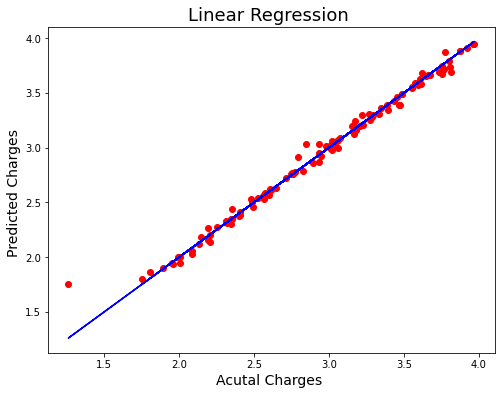

In [168]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=train_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Acutal Charges ",fontsize=14)
plt.ylabel("Predicted Charges ",fontsize=14)
plt.title("Linear Regression ",fontsize=18)
plt.savefig('lr.png')
plt.show()

Now we can see that maximum data near the best fit line . 

We got better accuracy So we dont do the hyperparameter tuning.

In [ ]:
parameter={'criterion':['mse','mae'],
          'max_features':['auto','sqrt','log2'],
          'max_depth':range(20,50),
          'min_samples_split':range(10,15),
          'min_samples_leaf':range(12,14)}



rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)
print(clf.best_params_)

In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features='auto',max_depth=26,min_samples_leaf=12,min_samples_split=10)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2 Score",rfs*100)
rfs_score=cross_val_score(rf,x,y,cv=5)
rfc=rfs_score.mean()
print('Cross Val Score',rfc*100)

# Conclusion

In [192]:
#So lets save the model
import pickle
filename=('Grades of Student')
pickle.dump(rf,open(filename,'wb'))

In [193]:
loaded_model=pickle.load(open('Grades of Student','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

98.58929692122133


In [195]:
conclusion=pd.DataFrame([loaded_model.predict(x_train)[:],train_pred[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,446,447,448,449,450,451,452,453,454,455
predicted,3.06469,3.64347,1.86989,2.93428,3.06311,2.63331,1.96321,2.36266,3.17477,2.87382,...,3.08492,2.26405,1.75443,3.36406,2.98848,3.33208,3.37016,3.58295,2.78033,3.22552
original,1.95889,1.86351,2.72140,2.39135,2.33326,1.82064,2.05908,2.43509,2.26259,2.64410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
